# Image Classification using K-nearest neighbor


<a id='toc'></a>
## Table of Contents

1. [Preparing and loading data in a proper shape](#section1)<br>
    a. [Writing the modified main dataset to csv and pickle](#section1a)<br>
    b. [Trying KNN classifier on non-randomized data](#section1b)<br>
    c. [Writing all other modified datasets to csv and pickle](#section1c)<br>
2. [Randomizing the dataset](#section2)<br>
    a. [Removing null values and duplicates](#section2a)<br>
    b. [Plotting frequency of classes in the dataset](#section2b)<br>
    c. [Plotting a sample of the dataset](#section2c)<br>
    d. [Writing randomized main dataset to csv and pickle](#section2d)<br>
    e. [Writing all other modified datasets to csv and pickle](#section2e)<br>
    f. [Trying KNN classifier on randomized data](#section2f)<br>
3. [Deeper Analysis](#section3)<br>
    a. [Extracting 10 best attributes for anger using absolute correlation value](#section3a)<br>
    b. [Extracting 10 best attributes for anger using chi squared](#section3b)<br>
    c. [Extracting 10 best attributes for disgust using absolute correlation value](#section3c)<br>
    d. [Extracting 10 best attributes for disgust using chi squared](#section3d)<br>
    e. [Extracting 10 best attributes for fear using absolute correlation value](#section3e)<br>
    f. [Extracting 10 best attributes for fear using chi squarede](#section3f)<br>
    g. [Extracting 10 best attributes for happy using absolute correlation value](#section3g)<br>
    h. [Extracting 10 best attributes for happy using chi squared](#section3h)<br>
    i. [Extracting 10 best attributes for neutral using absolute correlation value](#section3i)<br>
    j. [Extracting 10 best attributes for neutral using chi squared](#section3j)<br>
    k. [Extracting 10 best attributes for sad using absolute correlation value](#section3k)<br>
    l. [Extracting 10 best attributes for sad using chi squared](#section3l)<br>
    m. [Extracting 10 best attributes for surprise using absolute correlation value](#section3m)<br>
    n. [Extracting 10 best attributes for surprise using chi squared](#section3n)<br>
5. [Improving the classifier by selecting best attributes from the main dataset](#section4)<br>
    a. [Extracting best 70 attributes](#section4a)<br>
    b. [Extracting best 35 attributes](#section4b)<br>
    c. [Extracting best 14 attributes](#section4c)<br>
6. [Experimenting with the classifier](#section5)<br>
    a. [Running the KNN classifier on 70 best attributes](#section5a)<br>
    b. [Running the KNN classifier on 35 best attributes and with different numbers of neighbors](#section5b)<br>
    c. [Trying cross validation on 35 best attributes dataset, cross validating and trying different number of neighbors](#section5c)<br>
    d. [Running the KNN classifier on 14 best attributes and with different numbers of neighbors](#section5d)<br>
    e. [Trying cross validation on 14 best attributes dataset, cross validating and trying different number of neighbors](#section5e)<br>
7. [References](#section6)<br>

Import libraries

In [2]:
import glob
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import itertools
import operator

<a id='section1'></a>
[Top](#toc)
## 1. Preparing the data's shape and format before importing and working with it

Define the header we will use for the csv files

In [2]:
# We know that we have 48x48 pixel images, which gives us 2304 pixel in total
# we will use each pixel as a feature later, so we will generate a header with column names
# corresponsing to the pixel numbers as attributes
header = []

for i in range(2304):
    header.append('pixel'+str(i))

print(header)

['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel91

In [3]:
# Create a dictionary to map labels to emotion name
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy',
    4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

# Create a list of classes to use for the confusion matrices
classes = list(emotions.values())

<hr>

Read and edit the csv files to put each pixel value in a separate column

In [4]:
# Use python pandas library to read the csv file, with no headers, and discarding the first row which
# has the names 'emotion' and 'pixel' as column names
main_dataset = pd.read_csv('fer2018/fer2018.csv',
                           header=None, skiprows=1)
main_dataset.head(20)

,0,1
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...
9,2,255 254 255 254 254 179 122 107 95 124 149 150...


In [5]:
# Select the dataset and add the header we created earlier
# then we select the first column for each instance in our dataset
# and split the string containing image pixel value, we split by spaces
# and we expand the separated values into a new column for each that will be
# appended to the dataframe
main_dataset[header] = main_dataset[1].str.split(' ', expand=True)

# We drop the second column that has the pixel values as one string
main_dataset = main_dataset.drop([1], axis=1)

# We rename the first column to 'emotion'
main_dataset.rename(columns={0:'emotion'}, inplace=True) 

# View the result of the previous operations
main_dataset.head(20)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,0,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,2,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,4,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,6,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
5,2,55,55,55,55,55,54,60,68,54,...,90,83,77,53,37,34,30,34,30,57
6,4,20,17,19,21,25,38,42,42,46,...,29,36,68,91,85,93,97,99,107,118
7,3,77,78,79,79,78,75,60,55,47,...,126,124,139,150,179,180,175,125,67,68
8,3,85,84,90,121,101,102,133,153,153,...,132,151,111,106,102,99,89,58,73,84
9,2,255,254,255,254,254,179,122,107,95,...,160,176,188,251,252,253,253,254,255,255


<a id='section1a'></a>
[Top](#toc)<br>
Write the modified dataframe to csv

In [ ]:
main_dataset.to_csv('generated_data/preprocessed_csv/fer2018.csv',
                   index=False)

Convert dataframe to pickle

In [ ]:
main_dataset.to_pickle('generated_data/pickled/fer2018.pkl')

Test reading the pickled data into a dataframe

In [6]:
main_dataset_pickled = pd.read_pickle('generated_data/pickled/fer2018.pkl')
main_dataset_pickled.head(10)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,0,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,2,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,4,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,6,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
5,2,55,55,55,55,55,54,60,68,54,...,90,83,77,53,37,34,30,34,30,57
6,4,20,17,19,21,25,38,42,42,46,...,29,36,68,91,85,93,97,99,107,118
7,3,77,78,79,79,78,75,60,55,47,...,126,124,139,150,179,180,175,125,67,68
8,3,85,84,90,121,101,102,133,153,153,...,132,151,111,106,102,99,89,58,73,84
9,2,255,254,255,254,254,179,122,107,95,...,160,176,188,251,252,253,253,254,255,255


<hr>

<a id='section1b'></a>
[Top](#toc)
#### Trying the Nearest neighbor classifier on non-randomized data

Read the main dataset from and split the class column

In [7]:
# Select the column named 'emotion' from the dataset and save that alone as labels
labels_non_rnd = main_dataset[['emotion']]

# View the result
pd.DataFrame(labels_non_rnd).head(10)

,emotion
0,0
1,0
2,2
3,4
4,6
5,2
6,4
7,3
8,3
9,2


Mark the rest of the dataset as features

In [8]:
# Select all columns starting from the second column (the ones following the emotion column)
# and save them into a new features set
features_non_rnd = main_dataset.iloc[:, 1:]

# View the result
features_non_rnd.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,70,80,82,72,58,58,60,63,54,58,...,159,182,183,136,106,116,95,106,109,82
1,151,150,147,155,148,133,111,140,170,174,...,105,108,95,108,102,67,171,193,183,184
2,231,212,156,164,174,138,161,173,182,200,...,104,138,152,122,114,101,97,88,110,152
3,24,32,36,30,32,23,19,20,30,41,...,174,126,132,132,133,136,139,142,143,142
4,4,0,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
5,55,55,55,55,55,54,60,68,54,85,...,90,83,77,53,37,34,30,34,30,57
6,20,17,19,21,25,38,42,42,46,54,...,29,36,68,91,85,93,97,99,107,118
7,77,78,79,79,78,75,60,55,47,48,...,126,124,139,150,179,180,175,125,67,68
8,85,84,90,121,101,102,133,153,153,169,...,132,151,111,106,102,99,89,58,73,84
9,255,254,255,254,254,179,122,107,95,124,...,160,176,188,251,252,253,253,254,255,255


Create train and test sets of the features and labels ~70-30

In [9]:
# Use scikit learn's train_test_split function
X_train_non_rnd = features_non_rnd.iloc[:25000]
X_test_non_rnd = features_non_rnd.iloc[25001:]
y_train_non_rnd = labels_non_rnd.iloc[:25000]
y_test_non_rnd = labels_non_rnd.iloc[25001:]

In [10]:
# View the results
X_train_non_rnd.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,70,80,82,72,58,58,60,63,54,58,...,159,182,183,136,106,116,95,106,109,82
1,151,150,147,155,148,133,111,140,170,174,...,105,108,95,108,102,67,171,193,183,184
2,231,212,156,164,174,138,161,173,182,200,...,104,138,152,122,114,101,97,88,110,152
3,24,32,36,30,32,23,19,20,30,41,...,174,126,132,132,133,136,139,142,143,142
4,4,0,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30
5,55,55,55,55,55,54,60,68,54,85,...,90,83,77,53,37,34,30,34,30,57
6,20,17,19,21,25,38,42,42,46,54,...,29,36,68,91,85,93,97,99,107,118
7,77,78,79,79,78,75,60,55,47,48,...,126,124,139,150,179,180,175,125,67,68
8,85,84,90,121,101,102,133,153,153,169,...,132,151,111,106,102,99,89,58,73,84
9,255,254,255,254,254,179,122,107,95,124,...,160,176,188,251,252,253,253,254,255,255


In [11]:
# View the labels and make sure they're in the expected order as the corresponding features
pd.DataFrame(y_train_non_rnd).head(10)

,emotion
0,0
1,0
2,2
3,4
4,6
5,2
6,4
7,3
8,3
9,2


Convert data into numpy arrays to make it easier to feed into models and do calculations on them

In [12]:
X_train_non_rnd = np.asarray(X_train_non_rnd)
X_test_non_rnd = np.asarray(X_test_non_rnd)
y_train_non_rnd = np.asarray(y_train_non_rnd)
y_test_non_rnd = np.asarray(y_test_non_rnd)

In [13]:
print('Training examples: {}'.format(X_train_non_rnd.shape))
print('Testing examples: {}'.format(X_test_non_rnd.shape))
print('Training labels: {}'.format(y_train_non_rnd.shape))
print('Testing labels: {}'.format(y_test_non_rnd.shape))

Training examples: (25000, 2304)
Testing examples: (10886, 2304)
Training labels: (25000, 1)
Testing labels: (10886, 1)


In [14]:
# Reshape the labels to the format expected by the KNN classifier function (n_samples, )
y_train_non_rnd = y_train_non_rnd.reshape(y_train_non_rnd.shape[0], )
y_test_non_rnd = y_test_non_rnd.reshape(y_test_non_rnd.shape[0], )

In [15]:
# View the results
y_train_non_rnd.shape

(25000,)

<hr>

Create the classifier

In [16]:
# Use scikit learn's KNeighborsClassifier and set the number of neighbors to 3
neigh_k3_non_rnd = KNeighborsClassifier(n_neighbors=3)

# Train on our training split and labels
neigh_k3_non_rnd.fit(X_train_non_rnd, y_train_non_rnd)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [18]:
# Predict on the test split and return the resulting array
pred_non_rnd = neigh_k3_non_rnd.predict(X_test_non_rnd)

In [21]:
# Test the model on the test split
acc_non_rnd = accuracy_score(y_test_non_rnd, pred_non_rnd, normalize=True)
print('KNN accuracy on the on-randomized,  full dataset is {}'.format(acc_non_rnd))

KNN accuracy on the on-randomized,  full dataset is 0.3236266764651846


Create confusion matrix

In [22]:
# Code provided by scikit learn's documentation at
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

# Define a function to visualize a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

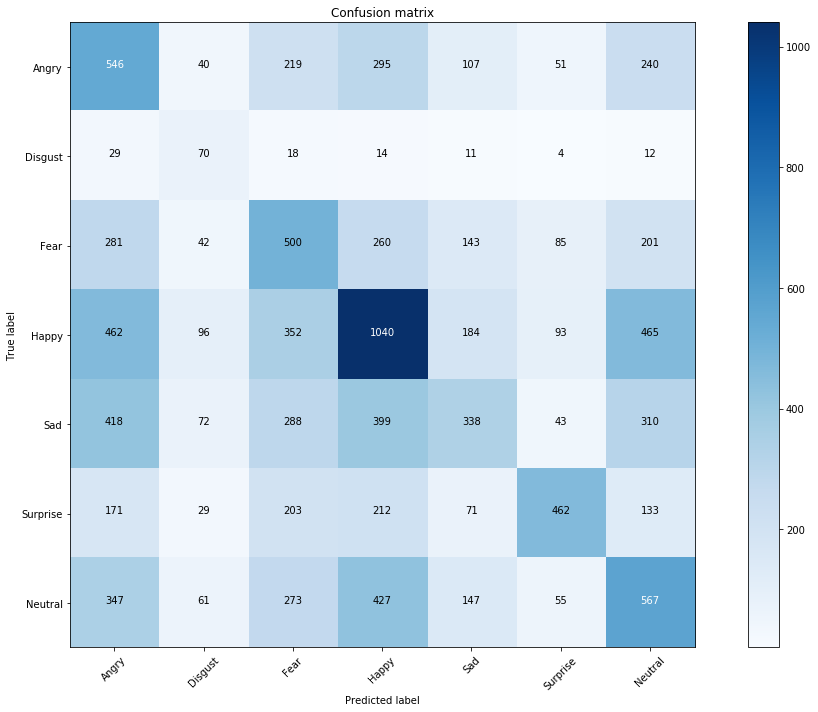

In [23]:
# Compute confusion matrix
cnf_matrix_non_rnd = confusion_matrix(y_test_non_rnd, pred_non_rnd)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix_non_rnd, classes=classes,
                      title='Confusion matrix')

plt.show()

<hr>

Evaluate the classifier using different metrics

In [24]:
# https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal

FP_non_rnd = cnf_matrix_non_rnd.sum(axis=0) - np.diag(cnf_matrix_non_rnd)
FN_non_rnd = cnf_matrix_non_rnd.sum(axis=1) - np.diag(cnf_matrix_non_rnd)
TP_non_rnd = np.diag(cnf_matrix_non_rnd)
TN_non_rnd = cnf_matrix_non_rnd.ravel().sum() - (FP_non_rnd + FN_non_rnd + TP_non_rnd)

# True positive rate (sensitivity)
TPR_non_rnd = TP_non_rnd / (TP_non_rnd + FN_non_rnd)
# True negative rate (specificity)
TNR_non_rnd = TN_non_rnd / (TN_non_rnd + FP_non_rnd)
# False positive rate
FPR_non_rnd = FP_non_rnd / (FP_non_rnd + TN_non_rnd)

In [25]:
print('\t\t True Positive Rate \t False Positive Rate')
print('Angry \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_non_rnd[0], FPR_non_rnd[0]))
print('Disgust \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_non_rnd[1], FPR_non_rnd[1]))
print('Fear \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_non_rnd[2], FPR_non_rnd[2]))
print('Happy \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_non_rnd[3], FPR_non_rnd[3]))
print('Sad \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_non_rnd[4], FPR_non_rnd[4]))
print('Surprise \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_non_rnd[5], FPR_non_rnd[5]))
print('Neutral \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_non_rnd[6], FPR_non_rnd[6]))

		 True Positive Rate 	 False Positive Rate
Angry 			 0.364 			 0.182
Disgust 		 0.443 			 0.032
Fear 			 0.331 			 0.144
Happy 			 0.386 			 0.196
Sad 			 0.181 			 0.074
Surprise 		 0.361 			 0.034
Neutral 		 0.302 			 0.151


In [26]:
# Report with precision, recall and f1-scores
print(classification_report(y_test_non_rnd, pred_non_rnd, target_names=classes))

             precision    recall  f1-score   support

      Angry       0.24      0.36      0.29      1498
    Disgust       0.17      0.44      0.25       158
       Fear       0.27      0.33      0.30      1512
      Happy       0.39      0.39      0.39      2692
        Sad       0.34      0.18      0.24      1868
   Surprise       0.58      0.36      0.45      1281
    Neutral       0.29      0.30      0.30      1877

avg / total       0.35      0.32      0.33     10886



<hr>

<a id='section1c'></a>
[Top](#toc)<br>
Repeat the previous preprocessing steps with all other files

1.Angry

In [27]:
angry_dataset = pd.read_csv('fer2018/fer2018angry.csv',
                           header=None, skiprows=1)
angry_dataset[header] = angry_dataset[1].str.split(' ', expand=True)
angry_dataset = angry_dataset.drop([1], axis=1)
angry_dataset.rename(columns={0:'emotion'}, inplace=True) 
angry_dataset.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,1,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,1,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,0,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,0,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,0,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [ ]:
angry_dataset.to_csv('generated_data/preprocessed_csv/fer2018angry.csv',
                   index=False)

In [ ]:
angry_dataset.to_pickle('generated_data/pickled/fer2018angry.pkl')

<hr>

2.Disgust

In [28]:
disgust_dataset = pd.read_csv('fer2018/fer2018disgust.csv',
                           header=None, skiprows=1)
disgust_dataset[header] = disgust_dataset[1].str.split(' ', expand=True)
disgust_dataset = disgust_dataset.drop([1], axis=1)
disgust_dataset.rename(columns={0:'emotion'}, inplace=True) 
disgust_dataset.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,0,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,0,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,0,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,0,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [ ]:
disgust_dataset.to_csv('generated_data/preprocessed_csv/fer2018disgust.csv',
                   index=False)

In [ ]:
disgust_dataset.to_pickle('generated_data/pickled/fer2018disgust.pkl')

<hr>

3.Fear

In [29]:
fear_dataset = pd.read_csv('fer2018/fer2018fear.csv',
                           header=None, skiprows=1)
fear_dataset[header] = fear_dataset[1].str.split(' ', expand=True)
fear_dataset = fear_dataset.drop([1], axis=1)
fear_dataset.rename(columns={0:'emotion'}, inplace=True) 
fear_dataset.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,0,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,1,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,0,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,0,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [ ]:
fear_dataset.to_csv('generated_data/preprocessed_csv/fer2018fear.csv',
                   index=False)

In [ ]:
fear_dataset.to_pickle('generated_data/pickled/fer2018fear.pkl')

<hr>

4.Happy

In [30]:
happy_dataset = pd.read_csv('fer2018/fer2018happy.csv',
                           header=None, skiprows=1)
happy_dataset[header] = happy_dataset[1].str.split(' ', expand=True)
happy_dataset = happy_dataset.drop([1], axis=1)
happy_dataset.rename(columns={0:'emotion'}, inplace=True) 
happy_dataset.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,0,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,0,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,0,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,0,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [ ]:
happy_dataset.to_csv('generated_data/preprocessed_csv/fer2018happy.csv',
                   index=False)

In [ ]:
happy_dataset.to_pickle('generated_data/pickled/fer2018happy.pkl')

<hr>

5.Neutral

In [31]:
neutral_dataset = pd.read_csv('fer2018/fer2018neutral.csv',
                           header=None, skiprows=1)
neutral_dataset[header] = neutral_dataset[1].str.split(' ', expand=True)
neutral_dataset = neutral_dataset.drop([1], axis=1)
neutral_dataset.rename(columns={0:'emotion'}, inplace=True) 
neutral_dataset.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,0,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,0,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,0,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,1,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [ ]:
neutral_dataset.to_csv('generated_data/preprocessed_csv/fer2018neutral.csv',
                   index=False)

In [ ]:
neutral_dataset.to_pickle('generated_data/pickled/fer2018neutral.pkl')

<hr>

6.Sad

In [32]:
sad_dataset = pd.read_csv('fer2018/fer2018sad.csv',
                           header=None, skiprows=1)
sad_dataset[header] = sad_dataset[1].str.split(' ', expand=True)
sad_dataset = sad_dataset.drop([1], axis=1)
sad_dataset.rename(columns={0:'emotion'}, inplace=True) 
sad_dataset.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,0,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,0,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,1,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,0,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [ ]:
sad_dataset.to_csv('generated_data/preprocessed_csv/fer2018sad.csv',
                   index=False)

In [ ]:
sad_dataset.to_pickle('generated_data/pickled/fer2018sad.pkl')

<hr>

7.Surprise

In [33]:
surprise_dataset = pd.read_csv('fer2018/fer2018surprise.csv',
                           header=None, skiprows=1)
surprise_dataset[header] = surprise_dataset[1].str.split(' ', expand=True)
surprise_dataset = surprise_dataset.drop([1], axis=1)
surprise_dataset.rename(columns={0:'emotion'}, inplace=True) 
surprise_dataset.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
0,0,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,0,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,0,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,0,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [ ]:
surprise_dataset.to_csv('generated_data/preprocessed_csv/fer218surprise.csv',
                   index=False)

In [ ]:
surprise_dataset.to_pickle('generated_data/pickled/fer2018surprise.pkl')

<hr>

<a id='section2'></a>
[Top](#toc)
## 2. Randomize Data

1.Main dataset

<a id='section2a'></a>
[Top](#toc)<br>
Removing null values and duplicates

In [52]:
main_dataset_cleaned = main_dataset.drop_duplicates()
main_dataset_cleaned = main_dataset_cleaned.dropna(axis=0, how='any')
print(main_dataset_cleaned.shape)

(34094, 2305)


More that 1000 rows were removed as they were duplicates or empty

In [214]:
# We use scikit learn's shuffle function to randomize our data
# we add a value for random state to the randomization pattern
# can be reproduces later
main_dataset_shuffled = shuffle(main_dataset_cleaned, random_state=42)

# View the result
main_dataset_shuffled.head(10)

(34094, 2305)


,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
17453,4,202,113,124,119,110,142,152,150,154,...,148,146,144,145,145,144,146,144,148,152
29614,0,114,117,116,106,89,72,103,118,113,...,39,37,44,42,44,57,49,49,56,69
29000,3,68,68,69,59,54,55,58,60,60,...,84,87,87,86,82,94,132,121,115,112
31503,4,94,99,103,91,88,75,73,90,45,...,175,195,197,197,196,202,209,218,225,232
29873,4,87,79,46,45,67,70,64,56,55,...,118,154,181,201,210,220,228,234,237,240
33805,2,22,71,177,91,71,166,115,88,102,...,238,237,243,251,253,254,254,254,254,254
7267,0,108,80,79,73,28,17,26,16,5,...,80,64,52,44,35,31,31,34,38,39
4383,6,0,102,244,233,223,181,131,16,23,...,95,78,65,60,63,57,44,32,26,23
3412,0,220,220,213,217,225,232,242,232,151,...,203,212,212,226,224,213,216,219,218,213
7507,6,10,18,14,22,30,28,25,34,27,...,171,174,181,186,189,193,197,205,210,212


<a id='section2b'></a>
[Top](#toc)<br>
Plotting frequency of classes in the dataset

In [3]:
plt.figure(figsize=(15, 10))
plt.hist(main_dataset_shuffled.iloc[:, 0])
plt.title("Frequency of each emotion")
tick_marks = np.arange(len(classes), 1.0)
plt.xticks(tick_marks, classes, rotation=45)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()

NameError: name 'main_dataset_shuffled' is not defined

<a id='section2c'></a>
[Top](#toc)<br>
Plot images

Label is: 3 => Happy


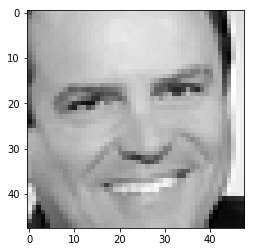

In [48]:
# Randomly select an image from the dataset
index = int(np.random.randint(low=0, high=main_dataset_shuffled.shape[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index, 1:], dtype=np.float64).reshape((48, 48))

# Using matplotlib to plot the image
plt.imshow(image, cmap='gray')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index, 0], emotions[main_dataset_shuffled.iloc[index, 0]]))

<a id='section2d'></a>
[Top](#toc)<br>
Write randomized data

In [231]:
main_dataset_shuffled.to_csv('generated_data/shuffled_csv/fer2018.csv')

In [232]:
main_dataset_shuffled.to_pickle('generated_data/pickled_shuffled/fer2018.pkl')

<hr>

<a id='section2e'></a>
[Top](#toc)<br>
Repeat cleaning and shuffling and saving for the rest of the files

2.Angry Dataset

In [56]:
angry_dataset_cleaned = angry_dataset.drop_duplicates()
angry_dataset_cleaned = angry_dataset_cleaned.dropna(axis=0, how='any')
print(angry_dataset_cleaned.shape)

(34057, 2305)


In [57]:
angry_dataset_shuffled = shuffle(angry_dataset_cleaned, random_state=42)
angry_dataset_shuffled.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
19632,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
23315,1,7,9,30,66,83,90,98,94,93,...,23,23,24,35,39,25,111,234,185,117
18612,0,111,120,129,135,142,149,154,159,168,...,174,178,184,191,201,211,215,208,195,171
11120,0,15,21,25,21,19,41,85,97,91,...,53,60,84,115,136,157,169,175,181,186
32614,0,40,47,29,40,36,20,16,26,42,...,171,158,149,148,143,140,138,131,121,136


In [58]:
angry_dataset_shuffled.to_csv('generated_data/shuffled_csv/fer2018angry.csv')

In [59]:
angry_dataset_shuffled.to_pickle('generated_data/pickled_shuffled/fer2018angry.pkl')

<hr>

3.Disgust Dataset

In [60]:
disgust_dataset_cleaned = disgust_dataset.drop_duplicates()
disgust_dataset_cleaned = disgust_dataset_cleaned.dropna(axis=0, how='any')
print(disgust_dataset_cleaned.shape)

(34037, 2305)


In [61]:
disgust_dataset_shuffled = shuffle(disgust_dataset_cleaned, random_state=42)
disgust_dataset_shuffled.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
23206,0,226,224,228,231,233,227,214,239,233,...,238,240,232,216,207,201,210,237,245,247
28198,0,72,71,64,112,133,108,133,138,133,...,188,180,142,131,132,131,129,126,127,126
12841,0,155,110,139,171,129,80,27,11,10,...,87,89,84,79,56,34,22,5,18,16
26235,0,79,31,48,42,53,77,114,143,159,...,184,180,185,186,182,171,155,155,160,159
5389,0,52,50,77,98,104,114,136,144,147,...,136,156,153,156,151,151,158,159,157,158


In [62]:
disgust_dataset_shuffled.to_csv('generated_data/shuffled_csv/fer2018disgust.csv')

In [63]:
disgust_dataset_shuffled.to_pickle('generated_data/pickled_shuffled/fer2018disgust.pkl')

<hr>

4.Fear Dataset

In [64]:
fear_dataset_cleaned = fear_dataset.drop_duplicates()
fear_dataset_cleaned = fear_dataset_cleaned.dropna(axis=0, how='any')
print(fear_dataset_cleaned.shape)

(34067, 2305)


In [65]:
fear_dataset_shuffled = shuffle(fear_dataset_cleaned, random_state=42)
fear_dataset_shuffled.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
7560,0,149,171,176,180,182,182,171,174,174,...,60,56,42,32,16,14,16,14,10,16
4835,0,70,93,111,108,93,86,92,107,103,...,180,175,173,166,157,143,128,130,133,139
10700,0,255,254,253,253,95,24,33,13,1,...,123,185,255,253,254,254,254,255,255,255
33487,0,117,117,114,99,78,56,65,84,102,...,30,73,57,119,194,191,156,124,127,114
12587,0,238,238,238,238,238,238,237,235,239,...,233,239,239,240,240,240,240,240,240,240


In [66]:
fear_dataset_shuffled.to_csv('generated_data/shuffled_csv/fer2018fear.csv')

In [67]:
fear_dataset_shuffled.to_pickle('generated_data/pickled_shuffled/fer2018fear.pkl')

<hr>

5.Happy Dataset

In [68]:
happy_dataset_cleaned = happy_dataset.drop_duplicates()
happy_dataset_cleaned = happy_dataset_cleaned.dropna(axis=0, how='any')
print(happy_dataset_cleaned.shape)

(34040, 2305)


In [69]:
happy_dataset_shuffled = shuffle(happy_dataset_cleaned, random_state=42)
happy_dataset_shuffled.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
21291,1,183,192,196,200,195,201,181,66,87,...,95,87,47,37,37,31,30,50,68,126
18292,0,160,164,165,169,175,179,183,183,179,...,80,79,74,68,62,31,18,14,3,9
20543,1,60,29,24,40,38,36,29,32,28,...,29,19,21,16,30,50,81,90,100,158
14713,0,240,138,104,87,64,52,57,62,61,...,133,136,125,106,83,124,158,204,221,233
33183,0,253,254,251,236,213,188,182,168,101,...,115,122,121,118,119,229,255,253,255,253


In [70]:
happy_dataset_shuffled.to_csv('generated_data/shuffled_csv/fer2018happy.csv')

In [71]:
happy_dataset_shuffled.to_pickle('generated_data/pickled_shuffled/fer2018happy.pkl')

<hr>

6.Neutral Dataset

In [72]:
neutral_dataset_cleaned = neutral_dataset.drop_duplicates()
neutral_dataset_cleaned = neutral_dataset_cleaned.dropna(axis=0, how='any')
print(neutral_dataset_cleaned.shape)

(34045, 2305)


In [73]:
neutral_dataset_shuffled = shuffle(neutral_dataset_cleaned, random_state=42)
neutral_dataset_shuffled.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
1838,0,199,222,224,223,226,235,237,233,234,...,153,149,49,11,18,15,15,12,19,27
19960,1,22,22,12,11,11,29,25,14,33,...,14,6,3,4,8,20,12,2,10,18
9851,0,158,161,84,3,8,3,2,0,1,...,159,163,153,156,164,166,131,125,177,176
32154,0,161,162,166,167,165,166,162,158,170,...,252,254,252,250,243,231,229,228,229,243
8606,0,51,51,55,57,44,62,61,68,65,...,209,212,212,200,185,147,122,190,219,219


In [74]:
neutral_dataset_shuffled.to_csv('generated_data/shuffled_csv/fer2018neutral.csv')

In [75]:
neutral_dataset_shuffled.to_pickle('generated_data/pickled_shuffled/fer2018neutral.pkl')

<hr>

7.Sad Dataset

In [76]:
sad_dataset_cleaned = sad_dataset.drop_duplicates()
sad_dataset_cleaned = sad_dataset_cleaned.dropna(axis=0, how='any')
print(sad_dataset_cleaned.shape)

(34056, 2305)


In [77]:
sad_dataset_shuffled = shuffle(sad_dataset_cleaned, random_state=42)
sad_dataset_shuffled.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
19635,0,190,191,191,193,194,193,194,193,202,...,114,96,10,6,8,10,12,14,14,10
23317,0,60,58,70,77,70,46,47,66,80,...,98,95,89,83,78,72,74,97,113,103
18614,0,226,221,222,225,218,210,216,223,161,...,234,234,235,235,234,234,235,235,234,234
11118,0,40,46,53,59,66,78,93,112,128,...,43,42,40,41,39,37,27,11,2,0
32613,1,19,6,19,20,13,13,24,43,84,...,79,78,78,79,81,83,79,73,64,61


In [78]:
sad_dataset_shuffled.to_csv('generated_data/shuffled_csv/fer2018sad.csv')

In [79]:
sad_dataset_shuffled.to_pickle('generated_data/pickled_shuffled/fer2018sad.pkl')

<hr>

8.Surprise Dataset

In [80]:
surprise_dataset_cleaned = surprise_dataset.drop_duplicates()
surprise_dataset_cleaned = surprise_dataset_cleaned.dropna(axis=0, how='any')
print(surprise_dataset_cleaned.shape)

(34053, 2305)


In [81]:
surprise_dataset_shuffled = shuffle(surprise_dataset_cleaned, random_state=42)
surprise_dataset_shuffled.head(5)

,emotion,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
15819,0,134,130,129,128,127,128,128,127,128,...,54,50,45,37,23,5,0,1,1,1
32111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,3,3,16,17
5534,0,59,71,89,118,139,160,183,222,212,...,0,0,0,0,0,0,0,0,1,0
28277,0,18,36,34,27,25,24,23,24,28,...,23,23,22,20,20,19,16,15,14,14
10235,0,167,163,142,138,154,173,159,151,168,...,177,177,178,181,182,176,157,169,172,168


In [82]:
surprise_dataset_shuffled.to_csv('generated_data/shuffled_csv/fer2018surprise.csv')

In [83]:
surprise_dataset_shuffled.to_pickle('generated_data/pickled_shuffled/fer2018surprise.pkl')

<hr>

<a id='section2f'></a>
[Top](#toc)
#### Build Nearest Neighbor Classifier for 3 neighbors on shuffled data

Read the main shuffled dataset from csv and split the class column

In [221]:
# Select the column named 'emotion' from the dataset and save that alone as labels
labels_shuffled = main_dataset_shuffled[['emotion']]

# View the result
pd.DataFrame(labels_shuffled).head(10)

,emotion
17453,4
29614,0
29000,3
31503,4
29873,4
33805,2
7267,0
4383,6
3412,0
7507,6


Mark the rest of the dataset as features

In [222]:
# Select all columns starting from the second column (the ones following the emotion column)
# and save them into a new features set
features_shuffled = main_dataset_shuffled.iloc[:, 1:]

# View the result
features_shuffled.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
17453,202,113,124,119,110,142,152,150,154,161,...,148,146,144,145,145,144,146,144,148,152
29614,114,117,116,106,89,72,103,118,113,98,...,39,37,44,42,44,57,49,49,56,69
29000,68,68,69,59,54,55,58,60,60,59,...,84,87,87,86,82,94,132,121,115,112
31503,94,99,103,91,88,75,73,90,45,64,...,175,195,197,197,196,202,209,218,225,232
29873,87,79,46,45,67,70,64,56,55,53,...,118,154,181,201,210,220,228,234,237,240
33805,22,71,177,91,71,166,115,88,102,104,...,238,237,243,251,253,254,254,254,254,254
7267,108,80,79,73,28,17,26,16,5,10,...,80,64,52,44,35,31,31,34,38,39
4383,0,102,244,233,223,181,131,16,23,29,...,95,78,65,60,63,57,44,32,26,23
3412,220,220,213,217,225,232,242,232,151,141,...,203,212,212,226,224,213,216,219,218,213
7507,10,18,14,22,30,28,25,34,27,36,...,171,174,181,186,189,193,197,205,210,212


Create train and test sets of the features and labels 70-30

In [223]:
# Use scikit learn's train_test_split function
X_train_shuffled, X_test_shuffled, y_train_shuffled, y_test_shuffled = train_test_split(features_shuffled,
                                                                                        labels_shuffled,
                                                                                        test_size=0.3,
                                                                                        random_state=42)

In [87]:
# View the results
X_train_shuffled.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2294,pixel2295,pixel2296,pixel2297,pixel2298,pixel2299,pixel2300,pixel2301,pixel2302,pixel2303
23996,10,11,15,27,33,42,63,69,89,105,...,86,88,80,79,99,104,105,106,106,107
10815,160,162,162,161,163,160,169,142,41,34,...,35,34,32,33,30,35,40,41,45,46
11819,111,106,100,103,118,118,126,105,78,80,...,89,96,104,112,115,119,131,141,135,89
5442,214,210,219,164,104,91,67,55,41,76,...,80,70,73,63,42,79,54,54,64,50
12212,192,113,112,130,127,101,96,107,116,136,...,202,210,212,214,215,219,220,217,206,181
31218,253,254,253,254,254,253,251,255,237,176,...,122,125,130,138,144,151,160,167,176,179
11407,51,46,67,40,121,184,178,190,193,194,...,0,2,5,2,1,6,6,6,8,8
30806,157,96,87,56,34,61,58,44,47,44,...,143,152,160,152,145,154,153,144,143,155
14120,129,129,129,129,129,129,129,129,131,134,...,103,98,91,83,78,79,79,81,94,96
660,95,95,97,97,100,104,99,98,95,86,...,1,1,0,7,25,15,11,23,29,12


In [224]:
# View the labels and make sure they're in the expected order as the corresponding features
pd.DataFrame(y_train_shuffled).head(10)

,emotion
6122,0
4991,5
11085,4
21409,4
10470,2
26441,4
12861,3
1692,6
28028,6
6749,2


Convert data into numpy arrays to make it easier to feed into models and do calculations on them

In [225]:
X_train_shuffled = np.asarray(X_train_shuffled)
X_test_shuffled = np.asarray(X_test_shuffled)
y_train_shuffled = np.asarray(y_train_shuffled)
y_test_shuffled = np.asarray(y_test_shuffled)

In [226]:
print('Training examples: {}'.format(X_train_shuffled.shape))
print('Testing examples: {}'.format(X_test_shuffled.shape))
print('Training labels: {}'.format(y_train_shuffled.shape))
print('Testing labels: {}'.format(y_test_shuffled.shape))

Training examples: (23865, 2304)
Testing examples: (10229, 2304)
Training labels: (23865, 1)
Testing labels: (10229, 1)


In [227]:
# Reshape the labels to the format expected by the KNN classifier function (n_samples, )
y_train_shuffled = y_train_shuffled.reshape(y_train_shuffled.shape[0], )
y_test_shuffled = y_test_shuffled.reshape(y_test_shuffled.shape[0], )

In [228]:
# View the results
y_train_shuffled.shape

(23865,)

Create the classifier

In [229]:
# Use scikit learn's KNeighborsClassifier and set the number of neighbors to 3
neigh_k3_shuffled = KNeighborsClassifier(n_neighbors=3)

# Train on our training split and labels
neigh_k3_shuffled.fit(X_train_shuffled, y_train_shuffled) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [230]:
# Predict on the test split and return the resulting array
pred_shuffled = neigh_k3_shuffled.predict(X_test_shuffled)

In [234]:
# Test the model on the test split
acc_shuffled = accuracy_score(y_test_shuffled, pred_shuffled)
print('KNN accuracy on the randomized,  full dataset is {}'.format(acc_shuffled))

KNN accuracy on the randomized,  full dataset is 0.29670544530257115


Create confusion matrix

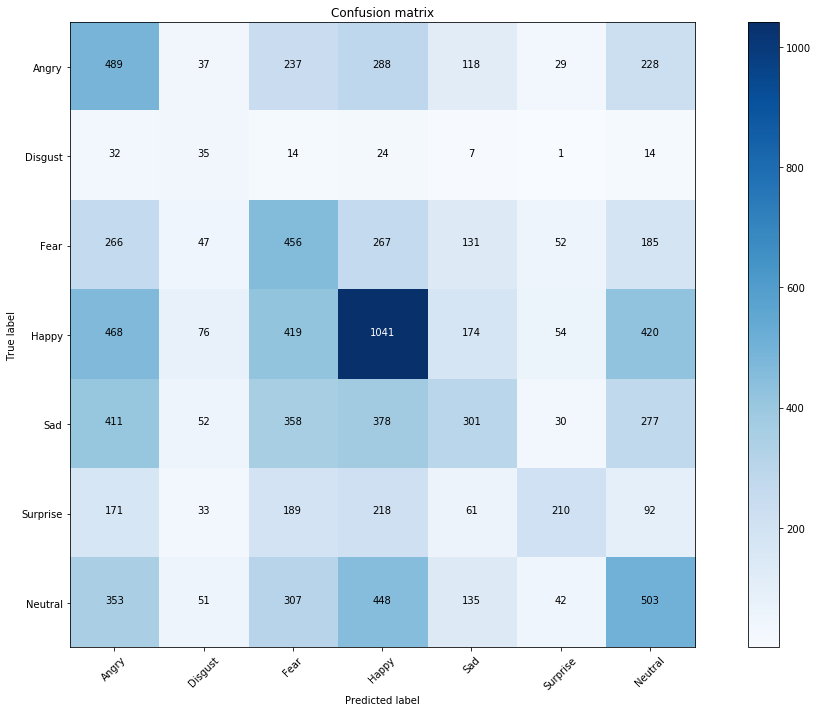

In [235]:
# Compute confusion matrix
cnf_matrix_shuffled = confusion_matrix(y_test_shuffled, pred_shuffled)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix_shuffled, classes=classes,
                      title='Confusion matrix')

plt.show()

**Result:** Randomizing the dataset slightly improves the classifier's performance

<hr>

Evaluate the classifier using different metrics

In [237]:
# https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal

FP_shuffled = cnf_matrix_shuffled.sum(axis=0) - np.diag(cnf_matrix_shuffled)
FN_shuffled = cnf_matrix_shuffled.sum(axis=1) - np.diag(cnf_matrix_shuffled)
TP_shuffled = np.diag(cnf_matrix_shuffled)
TN_shuffled = cnf_matrix_shuffled.ravel().sum() - (FP_shuffled + FN_shuffled + TP_shuffled)

# True positive rate (sensitivity)
TPR_shuffled = TP_shuffled / (TP_shuffled + FN_shuffled)
# True negative rate (specificity)
TNR_shuffled = TN_shuffled / (TN_shuffled + FP_shuffled)
# False positive rate
FPR_shuffled = FP_shuffled / (FP_shuffled + TN_shuffled)

In [238]:
print('\t\t True Positive Rate \t False Positive Rate')
print('Angry \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_shuffled[0], FPR_shuffled[0]))
print('Disgust \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_shuffled[1], FPR_shuffled[1]))
print('Fear \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_shuffled[2], FPR_shuffled[2]))
print('Happy \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_shuffled[3], FPR_shuffled[3]))
print('Sad \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_shuffled[4], FPR_shuffled[4]))
print('Surprise \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_shuffled[5], FPR_shuffled[5]))
print('Neutral \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_shuffled[6], FPR_shuffled[6]))

		 True Positive Rate 	 False Positive Rate
Angry 			 0.343 			 0.193
Disgust 		 0.276 			 0.029
Fear 			 0.325 			 0.173
Happy 			 0.393 			 0.214
Sad 			 0.167 			 0.074
Surprise 		 0.216 			 0.022
Neutral 		 0.274 			 0.145


In [239]:
# Report with precision, recall and f1-scores
print(classification_report(y_test_shuffled, pred_shuffled, target_names=classes))

             precision    recall  f1-score   support

      Angry       0.22      0.34      0.27      1426
    Disgust       0.11      0.28      0.15       127
       Fear       0.23      0.32      0.27      1404
      Happy       0.39      0.39      0.39      2652
        Sad       0.32      0.17      0.22      1807
   Surprise       0.50      0.22      0.30       974
    Neutral       0.29      0.27      0.28      1839

avg / total       0.32      0.30      0.30     10229



<hr>

<a id='section3'></a>
[Top](#toc)
## 3. Deeper analysis

Selecting best 10 attributes according to their correlation values to the class/target column

#### 1. Angry

In [101]:
# Splitting the dataset into features and labels after normalizing
X_angry = angry_dataset_shuffled.iloc[:, 1:]
y_angry = angry_dataset_shuffled.iloc[:, 0]

<a id='section3a'></a>
[Top](#toc)
- Using the absolute correlation values

In [102]:
# Calculate the absolute correlation values for all inputs using Panda's corr method
angry_corr = X_angry.astype('int64')

angry_corr_scores = np.absolute(angry_corr.apply(lambda x: x.corr(y_angry)))
pd.DataFrame(angry_corr_scores)

,0
pixel0,0.013043
pixel1,0.010425
pixel2,0.006642
pixel3,0.001946
pixel4,0.008113
pixel5,0.013019
pixel6,0.019164
pixel7,0.022519
pixel8,0.024356
pixel9,0.026657


In [103]:
# Select the 10 attributes (pixels) with the highest correlation scores
angry_corr_scores.sort_values(ascending=False, inplace=True)
angry_corr_best_10 = angry_corr_scores.iloc[:10]
angry_corr_best_10

pixel1361    0.083214
pixel1313    0.079886
pixel1422    0.078302
pixel1408    0.078290
pixel1362    0.078243
pixel1374    0.077918
pixel1360    0.077863
pixel1409    0.077181
pixel1314    0.077124
pixel1373    0.076992
dtype: float64

In [104]:
# No negative correlation values, showing the lowest values of the correlation scores
angry_corr_scores[-10:]

pixel879     0.000181
pixel98      0.000163
pixel1388    0.000159
pixel1341    0.000147
pixel1205    0.000130
pixel1586    0.000126
pixel527     0.000083
pixel320     0.000034
pixel1047    0.000027
pixel1444    0.000003
dtype: float64

In [105]:
# Extract the selected attributes from the angry dataset
select_angry_corr = X_angry[['pixel1361','pixel1313', 'pixel1362', 'pixel1408', 'pixel1314',
                            'pixel1409', 'pixel1360', 'pixel1422', 'pixel1374', 'pixel1373']]
select_angry_corr.head(5)

,pixel1361,pixel1313,pixel1362,pixel1408,pixel1314,pixel1409,pixel1360,pixel1422,pixel1374,pixel1373
19632,255,255,255,254,255,254,255,254,255,255
23315,63,60,77,70,74,85,62,128,153,190
18612,206,198,204,201,196,207,188,216,203,212
11120,164,171,162,157,172,154,167,150,168,142
32614,166,176,168,158,172,165,168,143,140,142


Show important attributes (pixels) on the image

Label is: 0 => Angry


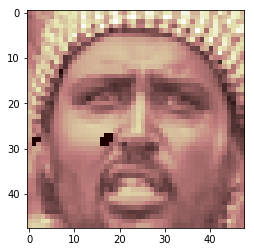

In [109]:
# Randomly select an image from the dataset
angry_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 0)
index_angry_corr = int(np.random.choice(angry_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_angry_corr, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
angry_imp_px_corr = []

# Highlight important attribute (pixel)
for pixel in select_angry_corr.columns:
    px = int(pixel[5:])
    row = int(px / 48)
    col = int(px % row)
    angry_imp_px_corr.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in angry_imp_px_corr:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_angry_corr, 0],
                                   emotions[main_dataset_shuffled.iloc[index_angry_corr, 0]]))

<hr>

<a id='section3b'></a>
[Top](#toc)
- Using chi-squared statistic

In [110]:
# Select best features using scikit learn's SelectKBest
# it selects best k attributes, 10 in our case, based on their correlation scores
# calculated using pearson method which outputs values with directions [-1, 1]
# and then taking the absolute value element-wise for the matrix so the output
# will be irrelevant of the direction and thus have the value [0, 1]
angry_chi2 = SelectKBest(chi2, k=10)
angry_chi2 = angry_chi2.fit(X_angry, y_angry)

# Calling the helper function 'get support' that provides a mask that keeps track of the locations
# of selected attributes so we can retrieve them later and display their names
indexes_angry_chi2 = angry_chi2.get_support(indices=True)
print(indexes_angry_chi2)

[1361 1362 1408 1422 1607 1608 1609 1652 1656 1657]


In [111]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
col_names_angry = [X_angry.columns[i] for i in indexes_angry_chi2]

# Reformat the dataset with the selected features for better visibility
select_angry_chi2 = X_angry[col_names_angry]
select_angry_chi2.head(5)

,pixel1361,pixel1362,pixel1408,pixel1422,pixel1607,pixel1608,pixel1609,pixel1652,pixel1656,pixel1657
19632,255,255,254,254,225,236,207,255,255,255
23315,63,77,70,128,74,67,71,118,87,78
18612,206,204,201,216,177,155,95,182,167,119
11120,164,162,157,150,140,124,110,172,162,145
32614,166,168,158,143,148,146,138,165,130,117


Label is: 0 => Angry


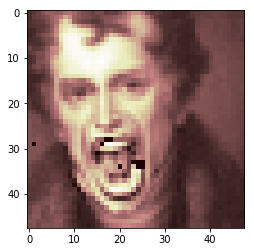

In [116]:
# Randomly select an image from the dataset
angry_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 0)
index_angry_chi2 = int(np.random.choice(angry_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_angry_chi2, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
angry_imp_px_chi2 = []

# Highlight important attribute (pixel)
for pixel in select_angry_chi2.columns:
    px = int(pixel[-4:])
    row = int(px / 48)
    col = int(px % row)
    angry_imp_px_chi2.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in angry_imp_px_chi2:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_angry_chi2, 0],
                                   emotions[main_dataset_shuffled.iloc[index_angry_chi2, 0]]))

<hr>

#### 2. Disgust

In [117]:
# Splitting the dataset into features and labels after normalizing
X_disgust = disgust_dataset_shuffled.iloc[:, 1:]
y_disgust = disgust_dataset_shuffled.iloc[:, 0]

<a id='section3c'></a>
[Top](#toc)
- Using the absolute correlation values

In [118]:
# Calculate the absolute correlation values for all inputs using Panda's corr method
disgust_corr = X_disgust.astype('int64')

disgust_corr_scores = np.absolute(disgust_corr.apply(lambda x: x.corr(y_disgust)))
pd.DataFrame(disgust_corr_scores)

,0
pixel0,0.013177
pixel1,0.014330
pixel2,0.015881
pixel3,0.014820
pixel4,0.011205
pixel5,0.006674
pixel6,0.000029
pixel7,0.005662
pixel8,0.010223
pixel9,0.015447


In [119]:
# Select the 10 attributes (pixels) with the highest correlation scores
disgust_corr_scores.sort_values(ascending=False, inplace=True)
disgust_corr_best_10 = disgust_corr_scores.iloc[:10]
disgust_corr_best_10

pixel25    0.039796
pixel23    0.039606
pixel26    0.039543
pixel24    0.039538
pixel29    0.039088
pixel28    0.038955
pixel30    0.038251
pixel27    0.038073
pixel77    0.037651
pixel76    0.037526
dtype: float64

In [120]:
# No negative correlation values
disgust_corr_scores[-10:]

pixel655     0.000069
pixel645     0.000063
pixel2109    0.000050
pixel1412    0.000042
pixel1601    0.000032
pixel6       0.000029
pixel1227    0.000018
pixel529     0.000015
pixel430     0.000008
pixel559     0.000006
dtype: float64

In [121]:
# Extract the selected attributes from the angry dataset
select_disgust_corr = X_disgust[['pixel23','pixel24', 'pixel29', 'pixel25', 'pixel26',
                            'pixel28', 'pixel30', 'pixel27', 'pixel77', 'pixel76']]
select_disgust_corr.head(5)

,pixel23,pixel24,pixel29,pixel25,pixel26,pixel28,pixel30,pixel27,pixel77,pixel76
23206,245,243,233,242,240,236,230,238,233,236
28198,98,81,98,66,74,94,95,83,106,103
12841,145,150,118,145,148,121,102,142,137,147
26235,153,160,151,163,163,147,177,158,169,166
5389,132,127,110,122,121,111,105,114,111,111


Label is: 1 => Disgust


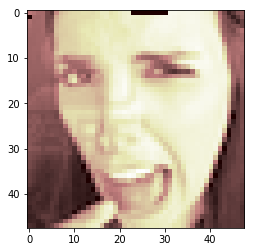

In [123]:
# Randomly select an image from the dataset
disgust_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 1)
index_disgust_corr = int(np.random.choice(disgust_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_disgust_corr, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
disgust_imp_px_corr = []

# Highlight important attribute (pixel)
for pixel in select_disgust_corr.columns:
    px = int(pixel[5:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    disgust_imp_px_corr.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in disgust_imp_px_corr:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_disgust_corr, 0],
                                   emotions[main_dataset_shuffled.iloc[index_disgust_corr, 0]]))

<hr>

<a id='section3d'></a>
[Top](#toc)
- Using chi-squared statistic

In [124]:
# Select best features using scikit learn's SelectKBest
# it selects best k attributes, 10 in our case, based on their correlation scores
# calculated using pearson method which outputs values with directions [-1, 1]
# and then taking the absolute value element-wise for the matrix so the output
# will be irrelevant of the direction and thus have the value [0, 1]
disgust_chi2 = SelectKBest(chi2, k=10)
disgust_chi2 = disgust_chi2.fit(X_disgust, y_disgust)

# Calling the helper function 'get support' that provides a mask that keeps track of the locations
# of selected attributes so we can retrieve them later and display their names
indexes_disgust_chi2 = disgust_chi2.get_support(indices=True)
print(indexes_disgust_chi2)

[18 23 24 25 26 27 28 29 30 78]


In [125]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
col_names_disgust = [X_disgust.columns[i] for i in indexes_disgust_chi2]

# Reformat the dataset with the selected features for better visibility
select_disgust_chi2 = X_disgust[col_names_disgust]
select_disgust_chi2.head(5)

,pixel18,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel78
23206,243,245,243,242,240,238,236,233,230,229
28198,147,98,81,66,74,83,94,98,95,102
12841,138,145,150,145,148,142,121,118,102,135
26235,151,153,160,163,163,158,147,151,177,176
5389,152,132,127,122,121,114,111,110,105,113


Label is: 1 => Disgust


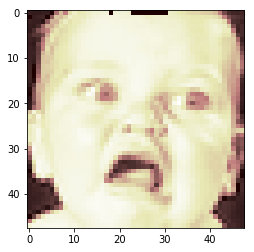

In [126]:
# Randomly select an image from the dataset
disgust_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 1)
index_disgust_chi2 = int(np.random.choice(disgust_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_disgust_chi2, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
disgust_imp_px_chi2 = []

# Highlight important attribute (pixel)
for pixel in select_disgust_chi2.columns:
    px = int(pixel[-2:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    disgust_imp_px_chi2.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in disgust_imp_px_chi2:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_disgust_chi2, 0],
                                   emotions[main_dataset_shuffled.iloc[index_disgust_chi2, 0]]))

<hr>

#### 3. Fear

In [127]:
# Splitting the dataset into features and labels after normalizing
X_fear = fear_dataset_shuffled.iloc[:, 1:]
y_fear = fear_dataset_shuffled.iloc[:, 0]

<a id='section3e'></a>
[Top](#toc)
- Using the absolute correlation values

In [128]:
# Calculate the absolute correlation values for all inputs using Panda's corr method
fear_corr = X_fear.astype('int64')

fear_corr_scores = np.absolute(fear_corr.apply(lambda x: x.corr(y_fear)))
pd.DataFrame(fear_corr_scores)

,0
pixel0,0.058144
pixel1,0.054666
pixel2,0.054490
pixel3,0.051994
pixel4,0.053233
pixel5,0.050224
pixel6,0.042119
pixel7,0.037442
pixel8,0.037738
pixel9,0.036639


In [129]:
# Select the 10 attributes (pixels) with the highest correlation scores
fear_corr_scores.sort_values(ascending=False, inplace=True)
fear_corr_best_10 = fear_corr_scores.iloc[:10]
fear_corr_best_10

pixel817    0.072550
pixel769    0.071124
pixel865    0.070689
pixel818    0.069431
pixel866    0.069242
pixel770    0.068637
pixel912    0.068425
pixel913    0.068189
pixel721    0.068071
pixel864    0.068003
dtype: float64

In [130]:
# No negative correlation values
fear_corr_scores[-10:]

pixel1999    0.001374
pixel1799    0.001126
pixel1802    0.001113
pixel2131    0.000947
pixel1795    0.000934
pixel1796    0.000662
pixel2138    0.000317
pixel1854    0.000259
pixel2081    0.000184
pixel1803    0.000127
dtype: float64

In [131]:
# Extract the selected attributes from the angry dataset
select_fear_corr = X_fear[['pixel817','pixel769', 'pixel865', 'pixel818', 'pixel866',
                            'pixel912', 'pixel770', 'pixel864', 'pixel913', 'pixel721']]
select_fear_corr.head(5)

,pixel817,pixel769,pixel865,pixel818,pixel866,pixel912,pixel770,pixel864,pixel913,pixel721
7560,139,154,135,111,122,178,149,167,174,127
4835,84,81,92,125,118,71,122,70,98,83
10700,255,255,255,220,241,255,183,253,253,255
33487,78,81,79,83,92,76,80,65,83,83
12587,238,238,237,237,237,238,238,238,237,238


Label is: 2 => Fear


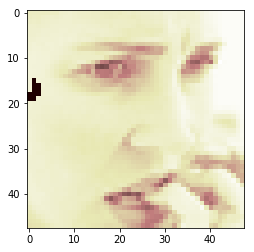

In [137]:
# Randomly select an image from the dataset
fear_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 2)
index_fear_corr = int(np.random.choice(fear_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_fear_corr, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
fear_imp_px_corr = []

# Highlight important attribute (pixel)
for pixel in select_fear_corr.columns:
    px = int(pixel[-3:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    fear_imp_px_corr.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in fear_imp_px_corr:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_fear_corr, 0],
                                   emotions[main_dataset_shuffled.iloc[index_fear_corr, 0]]))

<hr>

<a id='section3f'></a>
[Top](#toc)
- Using chi-squared statistic

In [138]:
# Select best features using scikit learn's SelectKBest
# it selects best k attributes, 10 in our case, based on their correlation scores
# calculated using pearson method which outputs values with directions [-1, 1]
# and then taking the absolute value element-wise for the matrix so the output
# will be irrelevant of the direction and thus have the value [0, 1]
fear_chi2 = SelectKBest(chi2, k=10)
fear_chi2 = fear_chi2.fit(X_fear, y_fear)

# Calling the helper function 'get support' that provides a mask that keeps track of the locations
# of selected attributes so we can retrieve them later and display their names
indexes_fear_chi2 = fear_chi2.get_support(indices=True)
print(indexes_fear_chi2)

[530 577 721 768 769 817 818 864 865 912]


In [139]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
col_names_fear = [X_fear.columns[i] for i in indexes_fear_chi2]

# Reformat the dataset with the selected features for better visibility
select_fear_chi2 = X_fear[col_names_fear]
select_fear_chi2.head(5)

,pixel530,pixel577,pixel721,pixel768,pixel769,pixel817,pixel818,pixel864,pixel865,pixel912
7560,129,119,127,149,154,139,111,167,135,178
4835,91,79,83,73,81,84,125,70,92,71
10700,14,163,255,253,255,255,220,253,255,255
33487,86,114,83,82,81,78,83,65,79,76
12587,239,238,238,238,238,238,237,238,237,238


Label is: 2 => Fear


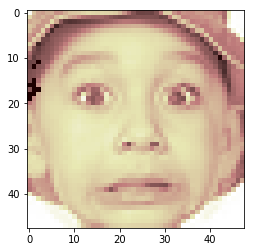

In [141]:
# Randomly select an image from the dataset
fear_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 2)
index_fear_chi2 = int(np.random.choice(fear_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_fear_chi2, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
fear_imp_px_chi2 = []

# Highlight important attribute (pixel)
for pixel in select_fear_chi2.columns:
    px = int(pixel[-3:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    fear_imp_px_chi2.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in fear_imp_px_chi2:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_fear_chi2, 0],
                                   emotions[main_dataset_shuffled.iloc[index_fear_chi2, 0]]))

<hr>

#### 4. Happy

In [142]:
# Splitting the dataset into features and labels after normalizing
X_happy = happy_dataset_shuffled.iloc[:, 1:]
y_happy = happy_dataset_shuffled.iloc[:, 0]

<a id='section3g'></a>
[Top](#toc)
- Using the absolute correlation values

In [143]:
# Calculate the absolute correlation values for all inputs using Panda's corr method
happy_corr = X_happy.astype('int64')

happy_corr_scores = np.absolute(happy_corr.apply(lambda x: x.corr(y_happy)))
pd.DataFrame(happy_corr_scores)

,0
pixel0,0.007218
pixel1,0.006253
pixel2,0.006883
pixel3,0.007070
pixel4,0.006624
pixel5,0.008830
pixel6,0.012008
pixel7,0.010780
pixel8,0.012115
pixel9,0.014549


In [144]:
# Select the 10 attributes (pixels) with the highest correlation scores
happy_corr_scores.sort_values(ascending=False, inplace=True)
happy_corr_best_10 = happy_corr_scores.iloc[:10]
happy_corr_best_10

pixel1896    0.152352
pixel1848    0.152199
pixel1895    0.151780
pixel1944    0.151591
pixel1943    0.150991
pixel1849    0.150431
pixel1847    0.149334
pixel1992    0.148945
pixel1897    0.148587
pixel1991    0.148335
dtype: float64

In [145]:
# No negative correlation values
happy_corr_scores[-10:]

pixel1079    0.000208
pixel44      0.000168
pixel89      0.000157
pixel2148    0.000152
pixel986     0.000126
pixel1861    0.000101
pixel1813    0.000063
pixel1033    0.000049
pixel934     0.000036
pixel1065    0.000016
dtype: float64

In [146]:
# Extract the selected attributes from the angry dataset
select_happy_corr = X_happy[['pixel1896','pixel1895', 'pixel1848', 'pixel1944', 'pixel1943',
                            'pixel1849', 'pixel1897', 'pixel1847', 'pixel1992', 'pixel1991']]
select_happy_corr.head(5)

,pixel1896,pixel1895,pixel1848,pixel1944,pixel1943,pixel1849,pixel1897,pixel1847,pixel1992,pixel1991
21291,167,148,120,193,185,130,191,139,188,182
18292,72,65,117,95,128,106,58,104,131,143
20543,193,187,199,158,159,198,207,197,130,129
14713,168,164,159,184,183,163,163,159,223,226
33183,163,162,126,143,133,93,148,134,109,109


Label is: 3 => Happy


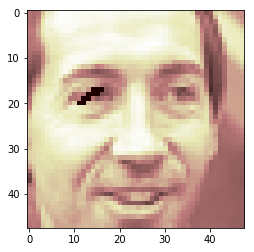

In [147]:
# Randomly select an image from the dataset
happy_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 3)
index_happy_corr = int(np.random.choice(happy_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_happy_corr, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
happy_imp_px_corr = []

# Highlight important attribute (pixel)
for pixel in select_happy_corr.columns:
    px = int(pixel[-3:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    happy_imp_px_corr.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in happy_imp_px_corr:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_happy_corr, 0],
                                   emotions[main_dataset_shuffled.iloc[index_happy_corr, 0]]))

<hr>

<a id='section3h'></a>
[Top](#toc)
- Using chi-squared statistic

In [148]:
# Select best features using scikit learn's SelectKBest
# it selects best k attributes, 10 in our case, based on their correlation scores
# calculated using pearson method which outputs values with directions [-1, 1]
# and then taking the absolute value element-wise for the matrix so the output
# will be irrelevant of the direction and thus have the value [0, 1]
happy_chi2 = SelectKBest(chi2, k=10)
happy_chi2 = fear_chi2.fit(X_happy, y_happy)

# Calling the helper function 'get support' that provides a mask that keeps track of the locations
# of selected attributes so we can retrieve them later and display their names
indexes_happy_chi2 = happy_chi2.get_support(indices=True)
print(indexes_happy_chi2)

[1847 1848 1849 1850 1894 1895 1896 1897 1943 1944]


In [149]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
col_names_happy = [X_happy.columns[i] for i in indexes_happy_chi2]

# Reformat the dataset with the selected features for better visibility
select_happy_chi2 = X_happy[col_names_happy]
select_happy_chi2.head(5)

,pixel1847,pixel1848,pixel1849,pixel1850,pixel1894,pixel1895,pixel1896,pixel1897,pixel1943,pixel1944
21291,139,120,130,175,137,148,167,191,185,193
18292,104,117,106,85,69,65,72,58,128,95
20543,197,199,198,198,178,187,193,207,159,158
14713,159,159,163,166,158,164,168,163,183,184
33183,134,126,93,123,123,162,163,148,133,143


Label is: 3 => Happy


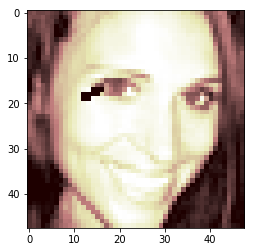

In [150]:
# Randomly select an image from the dataset
happy_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 3)
index_happy_chi2 = int(np.random.choice(happy_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_happy_chi2, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
happy_imp_px_chi2 = []

# Highlight important attribute (pixel)
for pixel in select_happy_chi2.columns:
    px = int(pixel[-3:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    happy_imp_px_chi2.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in happy_imp_px_chi2:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_happy_chi2, 0],
                                   emotions[main_dataset_shuffled.iloc[index_happy_chi2, 0]]))

<hr>

#### 5. Neutral

In [151]:
# Splitting the dataset into features and labels after normalizing
X_neutral = neutral_dataset_shuffled.iloc[:, 1:]
y_neutral = neutral_dataset_shuffled.iloc[:, 0]

<a id='section3i'></a>
[Top](#toc)
- Using the absolute correlation values

In [152]:
# Calculate the absolute correlation values for all inputs using Panda's corr method
neutral_corr = X_neutral.astype('int64')

neutral_corr_scores = np.absolute(neutral_corr.apply(lambda x: x.corr(y_neutral)))
pd.DataFrame(neutral_corr_scores)

,0
pixel0,0.057838
pixel1,0.063320
pixel2,0.067340
pixel3,0.073060
pixel4,0.078839
pixel5,0.080995
pixel6,0.079995
pixel7,0.080789
pixel8,0.081518
pixel9,0.082997


In [153]:
# Select the 10 attributes (pixels) with the highest correlation scores
neutral_corr_scores.sort_values(ascending=False, inplace=True)
neutral_corr_best_10 = neutral_corr_scores.iloc[:10]
neutral_corr_best_10

pixel10     0.086036
pixel11     0.085409
pixel58     0.085036
pixel88     0.084270
pixel12     0.084153
pixel13     0.083938
pixel149    0.083773
pixel137    0.083698
pixel136    0.083623
pixel196    0.083560
dtype: float64

In [154]:
# No negative correlation values
neutral_corr_scores[-10:]

pixel1217    2.472341e-04
pixel1889    2.374989e-04
pixel1363    2.183142e-04
pixel1476    1.469112e-04
pixel1798    1.382836e-04
pixel1950    1.278931e-04
pixel1559    1.118336e-04
pixel1564    1.001654e-04
pixel1800    4.641419e-05
pixel1322    8.933896e-07
dtype: float64

In [155]:
# Extract the selected attributes from the angry dataset
select_neutral_corr = X_neutral[['pixel10','pixel11', 'pixel12', 'pixel196', 'pixel88',
                            'pixel58', 'pixel149', 'pixel137', 'pixel136', 'pixel13']]
select_neutral_corr.head(5)

,pixel10,pixel11,pixel12,pixel196,pixel88,pixel58,pixel149,pixel137,pixel136,pixel13
1838,237,234,236,226,212,238,230,207,205,236
19960,33,91,48,11,15,37,5,16,27,44
9851,0,1,0,7,112,0,7,197,111,0
32154,173,173,174,156,176,173,160,173,174,174
8606,65,55,61,71,249,61,66,227,223,69


Label is: 6 => Neutral


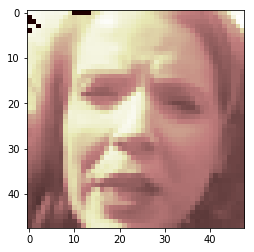

In [156]:
# Randomly select an image from the dataset
neutral_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 6)
index_neutral_corr = int(np.random.choice(neutral_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_neutral_corr, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
neutral_imp_px_corr = []

# Highlight important attribute (pixel)
for pixel in select_neutral_corr.columns:
    try:
        px = int(pixel[-3:])
    except:
        px = int(pixel[-2:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    neutral_imp_px_corr.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in neutral_imp_px_corr:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_neutral_corr, 0],
                                   emotions[main_dataset_shuffled.iloc[index_neutral_corr, 0]]))

<hr>

<a id='section3j'></a>
[Top](#toc)
- Using chi-squared statistic

In [157]:
# Select best features using scikit learn's SelectKBest
# it selects best k attributes, 10 in our case, based on their correlation scores
# calculated using pearson method which outputs values with directions [-1, 1]
# and then taking the absolute value element-wise for the matrix so the output
# will be irrelevant of the direction and thus have the value [0, 1]
neutral_chi2 = SelectKBest(chi2, k=10)
neutral_chi2 = neutral_chi2.fit(X_neutral, y_neutral)

# Calling the helper function 'get support' that provides a mask that keeps track of the locations
# of selected attributes so we can retrieve them later and display their names
indexes_neutral_chi2 = neutral_chi2.get_support(indices=True)
print(indexes_neutral_chi2)

[ 52  89 100 138 148 149 195 196 243 244]


In [158]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
col_names_neutral = [X_neutral.columns[i] for i in indexes_neutral_chi2]

# Reformat the dataset with the selected features for better visibility
select_neutral_chi2 = X_neutral[col_names_neutral]
select_neutral_chi2.head(5)

,pixel52,pixel89,pixel100,pixel138,pixel148,pixel149,pixel195,pixel196,pixel243,pixel244
1838,232,210,232,208,230,230,223,226,223,227
19960,17,19,16,14,12,5,15,11,14,14
9851,9,198,8,191,8,7,22,7,33,3
32154,167,176,169,176,158,160,155,156,172,173
8606,50,252,61,231,68,66,63,71,69,61


Label is: 6 => Neutral


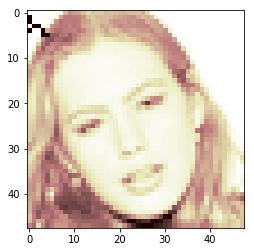

In [159]:
# Randomly select an image from the dataset
neutral_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 6)
index_neutral_chi2 = int(np.random.choice(neutral_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_neutral_chi2, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
neutral_imp_px_chi2 = []

# Highlight important attribute (pixel)
for pixel in select_neutral_chi2.columns:
    if (len(pixel) == 8):
        px = int(pixel[-3:])
    elif (len(pixel) == 7):
        px = int(pixel[-2:])
    elif (len(pixel) == 6):
        px = int(pixel[-1:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    neutral_imp_px_chi2.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in neutral_imp_px_chi2:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_neutral_chi2, 0],
                                   emotions[main_dataset_shuffled.iloc[index_neutral_chi2, 0]]))

<hr>

#### 6. Sad

In [160]:
# Splitting the dataset into features and labels after normalizing
X_sad = sad_dataset_shuffled.iloc[:, 1:]
y_sad = sad_dataset_shuffled.iloc[:, 0]

<a id='section3k'></a>
[Top](#toc)
- Using the absolute correlation values

In [161]:
# Calculate the absolute correlation values for all inputs using Panda's corr method
sad_corr = X_sad.astype('int64')

sad_corr_scores = np.absolute(sad_corr.apply(lambda x: x.corr(y_sad)))
pd.DataFrame(sad_corr_scores)

,0
pixel0,0.065588
pixel1,0.056331
pixel2,0.049360
pixel3,0.042367
pixel4,0.034930
pixel5,0.024672
pixel6,0.016436
pixel7,0.012116
pixel8,0.008456
pixel9,0.006840


In [162]:
# Select the 10 attributes (pixels) with the highest correlation scores
sad_corr_scores.sort_values(ascending=False, inplace=True)
sad_corr_best_10 = sad_corr_scores.iloc[:10]
sad_corr_best_10

pixel550    0.141354
pixel599    0.140461
pixel598    0.140217
pixel551    0.139773
pixel647    0.139465
pixel600    0.138933
pixel646    0.138238
pixel648    0.137701
pixel552    0.137328
pixel549    0.136481
dtype: float64

In [163]:
# No negative correlation values
sad_corr_scores[-10:]

pixel330    0.003677
pixel294    0.003375
pixel475    0.003365
pixel523    0.003352
pixel329    0.003302
pixel341    0.003055
pixel474    0.003011
pixel246    0.002652
pixel426    0.002620
pixel378    0.002561
dtype: float64

In [164]:
# Extract the selected attributes from the angry dataset
select_sad_corr = X_sad[['pixel550','pixel598', 'pixel599', 'pixel647', 'pixel551',
                            'pixel646', 'pixel600', 'pixel648', 'pixel552', 'pixel549']]
select_sad_corr.head(5)

,pixel550,pixel598,pixel599,pixel647,pixel551,pixel646,pixel600,pixel648,pixel552,pixel549
19635,143,143,144,145,142,144,150,149,149,145
23317,108,112,104,118,96,119,106,113,99,117
18614,85,100,99,167,80,163,119,155,80,75
11118,200,192,197,185,201,189,187,177,194,201
32613,152,149,139,148,150,161,138,130,153,157


Label is: 4 => Sad


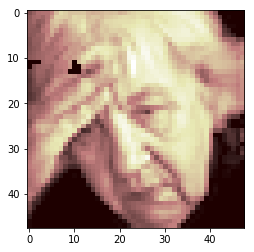

In [166]:
# Randomly select an image from the dataset
sad_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 4)
index_sad_corr = int(np.random.choice(sad_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_sad_corr, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
sad_imp_px_corr = []

# Highlight important attribute (pixel)
for pixel in select_sad_corr.columns:
    px = int(pixel[-3:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    sad_imp_px_corr.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in sad_imp_px_corr:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_sad_corr, 0],
                                   emotions[main_dataset_shuffled.iloc[index_sad_corr, 0]]))

<hr>

<a id='section3l'></a>
[Top](#toc)
- Using chi-squared statistic

In [167]:
# Select best features using scikit learn's SelectKBest
# it selects best k attributes, 10 in our case, based on their correlation scores
# calculated using pearson method which outputs values with directions [-1, 1]
# and then taking the absolute value element-wise for the matrix so the output
# will be irrelevant of the direction and thus have the value [0, 1]
sad_chi2 = SelectKBest(chi2, k=10)
sad_chi2 = sad_chi2.fit(X_sad, y_sad)

# Calling the helper function 'get support' that provides a mask that keeps track of the locations
# of selected attributes so we can retrieve them later and display their names
indexes_sad_chi2 = sad_chi2.get_support(indices=True)
print(indexes_sad_chi2)

[549 550 551 552 597 598 599 600 646 647]


In [168]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
col_names_sad = [X_sad.columns[i] for i in indexes_sad_chi2]

# Reformat the dataset with the selected features for better visibility
select_sad_chi2 = X_sad[col_names_sad]
select_sad_chi2.head(5)

,pixel549,pixel550,pixel551,pixel552,pixel597,pixel598,pixel599,pixel600,pixel646,pixel647
19635,145,143,142,149,149,143,144,150,144,145
23317,117,108,96,99,118,112,104,106,119,118
18614,75,85,80,80,95,100,99,119,163,167
11118,201,200,201,194,192,192,197,187,189,185
32613,157,152,150,153,150,149,139,138,161,148


Label is: 4 => Sad


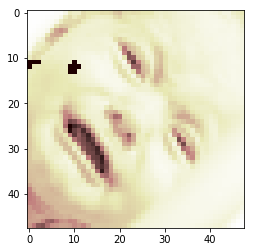

In [169]:
# Randomly select an image from the dataset
sad_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 4)
index_sad_chi2 = int(np.random.choice(sad_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_sad_chi2, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
sad_imp_px_chi2 = []

# Highlight important attribute (pixel)
for pixel in select_sad_chi2.columns:
    if (len(pixel) == 8):
        px = int(pixel[-3:])
    elif (len(pixel) == 7):
        px = int(pixel[-2:])
    elif (len(pixel) == 6):
        px = int(pixel[-1:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    sad_imp_px_chi2.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in sad_imp_px_chi2:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_sad_chi2, 0],
                                   emotions[main_dataset_shuffled.iloc[index_sad_chi2, 0]]))

<hr>

#### 7. Surprise

In [170]:
# Splitting the dataset into features and labels after normalizing
X_surprise = surprise_dataset_shuffled.iloc[:, 1:]
y_surprise = surprise_dataset_shuffled.iloc[:, 0]

<a id='section3m'></a>
[Top](#toc)
- Using the absolute correlation values

In [171]:
# Calculate the absolute correlation values for all inputs using Panda's corr method
surprise_corr = X_surprise.astype('int64')

surprise_corr_scores = np.absolute(surprise_corr.apply(lambda x: x.corr(y_surprise)))
pd.DataFrame(surprise_corr_scores)

,0
pixel0,0.122835
pixel1,0.117978
pixel2,0.110990
pixel3,0.101956
pixel4,0.088805
pixel5,0.077608
pixel6,0.070250
pixel7,0.063217
pixel8,0.056931
pixel9,0.057083


In [172]:
# Select the 10 attributes (pixels) with the highest correlation scores
surprise_corr_scores.sort_values(ascending=False, inplace=True)
surprise_corr_best_10 = surprise_corr_scores.iloc[:10]
surprise_corr_best_10

pixel1455    0.157052
pixel1407    0.155832
pixel743     0.155310
pixel791     0.155201
pixel744     0.155080
pixel839     0.154970
pixel1408    0.154618
pixel792     0.153910
pixel1454    0.153533
pixel1456    0.153432
dtype: float64

In [173]:
# No negative correlation values
surprise_corr_scores[-10:]

pixel2086    0.007669
pixel2091    0.007340
pixel2044    0.006806
pixel2136    0.005836
pixel2084    0.005757
pixel1891    0.005026
pixel2090    0.005008
pixel1796    0.004162
pixel2085    0.003948
pixel1987    0.001500
dtype: float64

In [174]:
# Extract the selected attributes from the angry dataset
select_surprise_corr = X_surprise[['pixel1407','pixel1455', 'pixel1408', 'pixel839', 'pixel743',
                            'pixel744', 'pixel791', 'pixel792', 'pixel1456', 'pixel1454']]
select_surprise_corr.head(5)

,pixel1407,pixel1455,pixel1408,pixel839,pixel743,pixel744,pixel791,pixel792,pixel1456,pixel1454
15819,110,110,97,122,120,114,118,117,103,120
32111,0,0,0,110,30,81,68,127,0,0
5534,0,0,1,7,2,17,9,35,0,0
28277,80,81,81,92,86,102,88,95,83,78
10235,208,206,206,175,173,172,171,181,202,210


Label is: 5 => Surprise


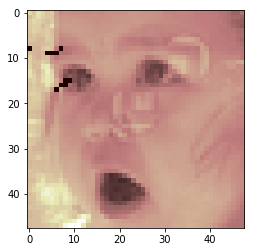

In [175]:
# Randomly select an image from the dataset
surprise_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 5)
index_surprise_corr = int(np.random.choice(surprise_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_surprise_corr, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
surprise_imp_px_corr = []

# Highlight important attribute (pixel)
for pixel in select_surprise_corr.columns:
    px = int(pixel[-3:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    surprise_imp_px_corr.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in surprise_imp_px_corr:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_surprise_corr, 0],
                                   emotions[main_dataset_shuffled.iloc[index_surprise_corr, 0]]))

<hr>

<a id='section3n'></a>
[Top](#toc)
- Using chi-squared statistic

In [176]:
# Select best features using scikit learn's SelectKBest
# it selects best k attributes, 10 in our case, based on their correlation scores
# calculated using pearson method which outputs values with directions [-1, 1]
# and then taking the absolute value element-wise for the matrix so the output
# will be irrelevant of the direction and thus have the value [0, 1]
surprise_chi2 = SelectKBest(chi2, k=10)
surprise_chi2 = surprise_chi2.fit(X_surprise, y_surprise)

# Calling the helper function 'get support' that provides a mask that keeps track of the locations
# of selected attributes so we can retrieve them later and display their names
indexes_surprise_chi2 = surprise_chi2.get_support(indices=True)
print(indexes_surprise_chi2)

[  0   1  47  48  49  95  96 143 144 191]


In [177]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
col_names_surprise = [X_surprise.columns[i] for i in indexes_surprise_chi2]

# Reformat the dataset with the selected features for better visibility
select_surprise_chi2 = X_sad[col_names_surprise]
select_surprise_chi2.head(5)

,pixel0,pixel1,pixel47,pixel48,pixel49,pixel95,pixel96,pixel143,pixel144,pixel191
19635,190,191,203,191,191,203,190,203,190,202
23317,60,58,82,64,69,83,66,84,67,84
18614,226,221,224,225,223,225,225,225,222,225
11118,40,46,1,46,53,0,47,0,50,0
32613,19,6,13,124,27,11,167,8,154,5


Label is: 5 => Surprise


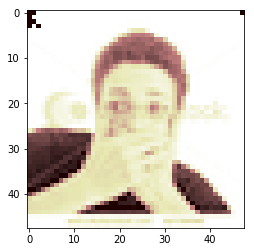

In [178]:
# Randomly select an image from the dataset
surprise_pics = np.where(main_dataset_shuffled.iloc[:, 0] == 5)
index_surprise_chi2 = int(np.random.choice(surprise_pics[0]))
    
# Reshaping pixels back to their 2D original shape (48 x 48) to plot them
image = np.asarray(main_dataset_shuffled.iloc[index_surprise_chi2, 1:], dtype=np.float64).reshape((48, 48))

# List of important pixels in the format (row, col)
surprise_imp_px_chi2 = []

# Highlight important attribute (pixel)
for pixel in select_surprise_chi2.columns:
    if (len(pixel) == 8):
        px = int(pixel[-3:])
    elif (len(pixel) == 7):
        px = int(pixel[-2:])
    elif (len(pixel) == 6):
        px = int(pixel[-1:])
    row = int(px / 48)
    if (row == 0):
        col = px
    else:
        col = int(px % row)
    surprise_imp_px_chi2.append((row, col))
    
# Loop through the array of important pixels and change corresponding pixel value in
# the original image
for px in surprise_imp_px_chi2:
    image[px[0], px[1]] = 0

# Using matplotlib to plot the image
plt.imshow(image, cmap='pink')
print ('Label is: {} => {}'.format(main_dataset_shuffled.iloc[index_surprise_chi2, 0],
                                   emotions[main_dataset_shuffled.iloc[index_surprise_chi2, 0]]))

<hr>

<a id='section4'></a>
[Top](#toc)
## 5. Improving the Classification using selected attributes

<a id='section4a'></a>
[Top](#toc)
#### Selecting 70 best attributes, 10 from each emotion dataset

Appending the arrays we extracted previously that contained locations of best attributes in each emotion dataset

In [240]:
indexes_70_corr = []
names_70_corr = [select_angry_corr, select_disgust_corr, select_fear_corr, select_happy_corr,
        select_neutral_corr, select_sad_corr, select_surprise_corr]

for i in range(0, 7):
    indexes_70_corr.extend([int(item.replace('pixel','')) for item in names_70_corr[i]])

print(len(np.unique(indexes_70_corr)))

69


We have the best 70 attributes locations, we'll use them to get their names on the main dataset

In [241]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
features_shuffled = main_dataset_shuffled.iloc[:, 1:]
col_names_70 = [features_shuffled.columns[i] for i in np.unique(indexes_70_corr)]

# Reformat the dataset with the selected features for better visibility
main_dataset_best70 = features_shuffled.iloc[:, np.unique(indexes_70_corr)]
main_dataset_best70.columns = col_names_70
main_dataset_best70_labeled = pd.concat([main_dataset_shuffled.iloc[:, 0],
                                         main_dataset_best70], axis=1)

main_dataset_best70_labeled.head(10)

,emotion,pixel10,pixel11,pixel12,pixel13,pixel23,pixel24,pixel25,pixel26,pixel27,...,pixel1847,pixel1848,pixel1849,pixel1895,pixel1896,pixel1897,pixel1943,pixel1944,pixel1991,pixel1992
17453,4,165,179,178,173,183,178,178,178,180,...,113,115,133,133,139,152,127,142,133,150
29614,0,99,108,126,153,179,180,177,176,175,...,84,94,55,121,95,106,106,94,52,59
29000,3,26,14,15,16,20,19,19,20,20,...,25,30,36,21,24,31,19,22,17,19
31503,4,187,191,180,191,249,252,252,252,252,...,144,127,135,154,144,133,151,148,148,146
29873,4,56,35,30,27,126,152,178,195,205,...,23,29,35,99,72,58,98,105,83,91
33805,2,105,133,145,137,151,199,206,199,203,...,34,32,49,96,99,124,100,95,179,82
7267,0,20,71,145,182,183,167,158,142,123,...,85,84,65,19,14,15,74,51,125,113
4383,6,40,58,61,72,144,138,182,207,196,...,151,144,151,134,137,132,143,143,144,103
3412,0,143,145,146,144,147,150,151,151,151,...,112,92,98,92,100,109,100,104,113,121
7507,6,52,41,36,39,44,35,36,29,32,...,77,79,97,132,121,108,142,132,101,104


Write the selected attributes (70) to csv as a reduced dataset

In [242]:
main_dataset_best70_labeled.to_csv('generated_data/selected_70/fer2018.csv',
                                  index=False)

In [243]:
main_dataset_best70_labeled.to_pickle('generated_data/selected_70/fer2018.pkl')

<hr>

<a id='section4b'></a>
[Top](#toc)
#### Selecting 35 best attributes, 5 from each emotion dataset

In [244]:
indexes_35_corr = []

names_35_corr = [select_angry_corr.iloc[:, :5], select_disgust_corr.iloc[:, :5], select_fear_corr.iloc[:, :5],
                 select_happy_corr.iloc[:, :5], select_neutral_corr.iloc[:, :5], select_sad_corr.iloc[:, :5],
                 select_surprise_corr.iloc[:, :5]]

for i in range(0, 7):
    indexes_35_corr.extend([int(item.replace('pixel','')) for item in names_35_corr[i]])
    
print(len(np.unique(indexes_35_corr)))

34


We have the best 35 attributes locations, we'll use them to get their names on the main dataset

In [245]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
col_names_35 = [features_shuffled.columns[i] for i in np.unique(indexes_35_corr)]

# Reformat the dataset with the selected features for better visibility
main_dataset_best35 = features_shuffled.iloc[:, np.unique(indexes_35_corr)]
main_dataset_best35.columns = col_names_35
main_dataset_best35_labeled = pd.concat([main_dataset_shuffled.iloc[:, 0],
                                         main_dataset_best35], axis=1)

main_dataset_best35_labeled.head(10)

,emotion,pixel10,pixel11,pixel12,pixel23,pixel24,pixel25,pixel26,pixel29,pixel88,...,pixel1361,pixel1362,pixel1407,pixel1408,pixel1455,pixel1848,pixel1895,pixel1896,pixel1943,pixel1944
17453,4,165,179,178,183,178,178,178,180,170,...,148,145,152,132,148,115,133,139,127,142
29614,0,99,108,126,179,180,177,176,177,164,...,124,101,154,128,162,94,121,95,106,94
29000,3,26,14,15,20,19,19,20,21,74,...,32,31,32,31,29,30,21,24,19,22
31503,4,187,191,180,249,252,252,252,247,201,...,199,200,60,79,66,127,154,144,151,148
29873,4,56,35,30,126,152,178,195,209,110,...,54,159,87,63,90,29,99,72,98,105
33805,2,105,133,145,151,199,206,199,147,86,...,132,142,95,101,142,32,96,99,100,95
7267,0,20,71,145,183,167,158,142,98,20,...,181,203,153,176,151,84,19,14,74,51
4383,6,40,58,61,144,138,182,207,160,85,...,193,196,192,191,185,144,134,137,143,143
3412,0,143,145,146,147,150,151,151,153,145,...,125,74,109,138,114,92,92,100,100,104
7507,6,52,41,36,44,35,36,29,32,21,...,73,72,109,102,117,79,132,121,142,132


Write the selected attributes (35) to csv as a reduced dataset

In [246]:
main_dataset_best35_labeled.to_csv('generated_data/selected_35/fer2018.csv',
                                  index=False)

In [247]:
main_dataset_best70_labeled.to_pickle('generated_data/selected_35/fer2018.pkl')

<hr>

<a id='section4c'></a>
[Top](#toc)
#### Selecting 14 best attributes, 2 from each emotion dataset

In [248]:
indexes_14_corr = []

names_14_corr = [select_angry_corr.iloc[:, :2], select_disgust_corr.iloc[:, :2], select_fear_corr.iloc[:, :2],
                 select_happy_corr.iloc[:, :2], select_neutral_corr.iloc[:, :2], select_sad_corr.iloc[:, :2],
                 select_surprise_corr.iloc[:, :2]]

for i in range(0, 7):
    indexes_14_corr.extend([int(item.replace('pixel','')) for item in names_14_corr[i]])
    
print(len(np.unique(indexes_14_corr)))

14


We have the best 14 attributes locations, we'll use them to get their names on the main dataset

In [249]:
# Extracting the column names from the original dataset by selecting their location
# saved previously in the indexes array
col_names_14 = [features_shuffled.columns[i] for i in indexes_14_corr]

# Reformat the dataset with the selected features for better visibility
main_dataset_best14 = features_shuffled.iloc[:, indexes_14_corr]
main_dataset_best14.columns = col_names_14
main_dataset_best14_labeled = pd.concat([main_dataset_shuffled.iloc[:, 0],
                                         main_dataset_best14], axis=1)

main_dataset_best14_labeled.head(10)

,emotion,pixel1361,pixel1313,pixel23,pixel24,pixel817,pixel769,pixel1896,pixel1895,pixel10,pixel11,pixel550,pixel598,pixel1407,pixel1455
17453,4,148,145,183,178,147,64,139,133,165,179,162,159,152,148
29614,0,124,114,179,180,76,75,95,121,99,108,21,58,154,162
29000,3,32,33,20,19,84,83,24,21,26,14,24,26,32,29
31503,4,199,242,249,252,103,102,144,154,187,191,210,214,60,66
29873,4,54,52,126,152,49,33,72,99,56,35,170,160,87,90
33805,2,132,131,151,199,133,92,99,96,105,133,138,143,95,142
7267,0,181,185,183,167,31,27,14,19,20,71,175,163,153,151
4383,6,193,188,144,138,212,216,137,134,40,58,166,163,192,185
3412,0,125,143,147,150,156,169,100,92,143,145,153,153,109,114
7507,6,73,57,44,35,45,37,121,132,52,41,119,109,109,117


Write the selected attributes (14) to csv as a reduced dataset

In [250]:
main_dataset_best14_labeled.to_csv('generated_data/selected_14/fer2018.csv',
                                  index=False)

In [251]:
main_dataset_best14_labeled.to_pickle('generated_data/selected_14/fer2018.pkl')

<hr>

<a id='section5'></a>
[Top](#toc)
## 6. Experimenting with the classifier and running Nearest neighbor on different selected attributes

<a id='section5a'></a>
[Top](#toc)
#### Running KNN classifier on the full dataset with selected 70 best attributes

Create train and test sets of the features and labels 70-30

In [252]:
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(main_dataset_best70_labeled.iloc[:, 1:],
                                                                main_dataset_best70_labeled.iloc[:, 0],
                                                                test_size=0.3,
                                                                random_state=42)

In [253]:
X_train_70.head(10)

,pixel10,pixel11,pixel12,pixel13,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,...,pixel1847,pixel1848,pixel1849,pixel1895,pixel1896,pixel1897,pixel1943,pixel1944,pixel1991,pixel1992
6122,155,167,169,165,189,191,191,186,185,183,...,100,102,94,30,21,11,54,34,77,66
4991,113,122,129,124,118,108,95,82,81,82,...,76,57,53,93,91,106,133,134,134,138
11085,76,88,64,34,82,88,75,89,101,97,...,127,134,133,173,171,171,163,148,167,159
21409,82,94,81,111,175,192,187,195,208,200,...,67,61,64,80,74,72,61,55,12,14
10470,51,59,54,71,155,151,162,170,166,135,...,197,200,203,204,207,198,198,210,157,169
26441,32,32,40,40,36,38,38,55,77,75,...,26,21,33,35,29,44,26,24,25,27
12861,93,93,83,68,196,194,193,192,189,186,...,181,155,100,118,110,108,113,114,120,125
1692,150,148,149,133,150,144,138,135,133,130,...,187,195,142,156,120,58,106,106,184,187
28028,46,47,76,73,51,47,38,49,86,104,...,51,102,143,97,137,142,115,115,93,87
6749,27,27,31,20,15,23,19,44,27,32,...,109,126,167,17,123,112,32,31,46,74


Convert data into numpy arrays to make it easier to feed into models and do calculations on them

In [254]:
X_train_70 = np.asarray(X_train_70)
X_test_70 = np.asarray(X_test_70)
y_train_70 = np.asarray(y_train_70)
y_test_70 = np.asarray(y_test_70)

In [255]:
print('Training examples: {}'.format(X_train_70.shape))
print('Testing examples: {}'.format(X_test_70.shape))
print('Training labels: {}'.format(y_train_70.shape))
print('Testing labels: {}'.format(y_test_70.shape))

Training examples: (23865, 69)
Testing examples: (10229, 69)
Training labels: (23865,)
Testing labels: (10229,)


In [256]:
y_train_70 = y_train_70.reshape(y_train_70.shape[0], )
y_test_70 = y_test_70.reshape(y_test_70.shape[0], )

In [257]:
y_train_70.shape

(23865,)

Create the classifier

In [258]:
neigh_70_3 = KNeighborsClassifier(n_neighbors=3)
neigh_70_3.fit(X_train_70, y_train_70) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [259]:
neigh_70_3.score(X_test_70, y_test_70)

0.27187408348812203

- Experimenting with different number of neighbors (n=5)

In [260]:
neigh_70_5 = KNeighborsClassifier(n_neighbors=5)
neigh_70_5.fit(X_train_70, y_train_70) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [261]:
neigh_70_5.score(X_test_70, y_test_70)

0.28741812493889923

- Experimenting with different number of neighbors (n=7)

In [262]:
neigh_70_7 = KNeighborsClassifier(n_neighbors=7)
neigh_70_7.fit(X_train_70, y_train_70) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [263]:
neigh_70_7.score(X_test_70, y_test_70)

0.28751588620588525

In [265]:
# Predict on the test split and return the resulting array
pred_70_7 = neigh_70_7.predict(X_test_70)

Create confusion matrix for classifier with 7 neighbors

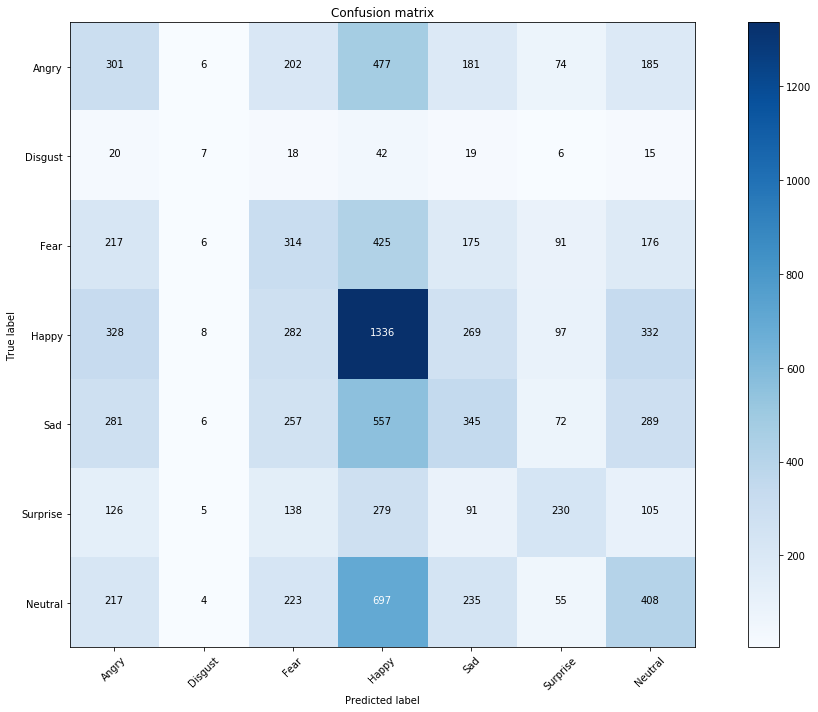

In [266]:
# Compute confusion matrix
cnf_matrix_70 = confusion_matrix(y_test_70, pred_70_7)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix_70, classes=classes,
                      title='Confusion matrix')

plt.show()

<hr>

Evaluate the classifier using different metrics

In [267]:
# https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal

FP_70 = cnf_matrix_70.sum(axis=0) - np.diag(cnf_matrix_70)
FN_70 = cnf_matrix_70.sum(axis=1) - np.diag(cnf_matrix_70)
TP_70 = np.diag(cnf_matrix_70)
TN_70 = cnf_matrix_70.ravel().sum() - (FP_70 + FN_70 + TP_70)

# True positive rate (sensitivity)
TPR_70 = TP_70 / (TP_70 + FN_70)
# True negative rate (specificity)
TNR_70 = TN_70 / (TN_70 + FP_70)
# False positive rate
FPR_70 = FP_70 / (FP_70 + TN_70)

In [268]:
print('\t\t True Positive Rate \t False Positive Rate')
print('Angry \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_70[0], FPR_70[0]))
print('Disgust \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_70[1], FPR_70[1]))
print('Fear \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_70[2], FPR_70[2]))
print('Happy \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_70[3], FPR_70[3]))
print('Sad \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_70[4], FPR_70[4]))
print('Surprise \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_70[5], FPR_70[5]))
print('Neutral \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_70[6], FPR_70[6]))

		 True Positive Rate 	 False Positive Rate
Angry 			 0.211 			 0.135
Disgust 		 0.055 			 0.003
Fear 			 0.224 			 0.127
Happy 			 0.504 			 0.327
Sad 			 0.191 			 0.115
Surprise 		 0.236 			 0.043
Neutral 		 0.222 			 0.131


In [269]:
# Report with precision, recall and f1-scores
print(classification_report(y_test_70, pred_70_7, target_names=classes))

             precision    recall  f1-score   support

      Angry       0.20      0.21      0.21      1426
    Disgust       0.17      0.06      0.08       127
       Fear       0.22      0.22      0.22      1404
      Happy       0.35      0.50      0.41      2652
        Sad       0.26      0.19      0.22      1807
   Surprise       0.37      0.24      0.29       974
    Neutral       0.27      0.22      0.24      1839

avg / total       0.28      0.29      0.28     10229



<hr>

<a id='section5b'></a>
[Top](#toc)
#### Running classifier on best 35 attributes

Create train and test sets of the features and labels 70-30

In [270]:
X_train_35, X_test_35, y_train_35, y_test_35 = train_test_split(main_dataset_best35_labeled.iloc[:, 1:],
                                                                main_dataset_best35_labeled.iloc[:, 0],
                                                                test_size=0.3,
                                                                random_state=42)

In [271]:
X_train_35.head(10)

,pixel10,pixel11,pixel12,pixel23,pixel24,pixel25,pixel26,pixel29,pixel88,pixel196,...,pixel1361,pixel1362,pixel1407,pixel1408,pixel1455,pixel1848,pixel1895,pixel1896,pixel1943,pixel1944
6122,155,167,169,189,191,191,186,181,118,117,...,166,144,161,161,160,102,30,21,54,34
4991,113,122,129,118,108,95,82,80,86,137,...,162,160,152,152,182,57,93,91,133,134
11085,76,88,64,82,88,75,89,86,64,92,...,212,214,202,209,194,134,173,171,163,148
21409,82,94,81,175,192,187,195,189,215,86,...,28,20,36,25,50,61,80,74,61,55
10470,51,59,54,155,151,162,170,80,50,52,...,49,19,127,76,104,200,204,207,198,210
26441,32,32,40,36,38,38,55,77,236,29,...,132,108,149,147,149,21,35,29,26,24
12861,93,93,83,196,194,193,192,187,134,60,...,145,135,180,173,178,155,118,110,113,114
1692,150,148,149,150,144,138,135,131,49,187,...,228,220,230,226,232,195,156,120,106,106
28028,46,47,76,51,47,38,49,182,255,34,...,231,212,214,219,215,102,97,137,115,115
6749,27,27,31,15,23,19,44,20,10,65,...,205,196,209,204,203,126,17,123,32,31


Convert data into numpy arrays to make it easier to feed into models and do calculations on them

In [272]:
X_train_35 = np.asarray(X_train_35)
X_test_35 = np.asarray(X_test_35)
y_train_35 = np.asarray(y_train_35)
y_test_35 = np.asarray(y_test_35)

In [273]:
print('Training examples: {}'.format(X_train_35.shape))
print('Testing examples: {}'.format(X_test_35.shape))
print('Training labels: {}'.format(y_train_35.shape))
print('Testing labels: {}'.format(y_test_35.shape))

Training examples: (23865, 34)
Testing examples: (10229, 34)
Training labels: (23865,)
Testing labels: (10229,)


In [274]:
y_train_35 = y_train_35.reshape(y_train_35.shape[0], )
y_test_35 = y_test_35.reshape(y_test_35.shape[0], )

In [275]:
y_train_35.shape

(23865,)

Create the classifier

In [276]:
neigh_35_3 = KNeighborsClassifier(n_neighbors=3)
neigh_35_3.fit(X_train_35, y_train_35) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [277]:
neigh_35_3.score(X_test_35, y_test_35)

0.2490957082803793

In [278]:
# Predict on the test split and return the resulting array
pred_35_3 = neigh_35_3.predict(X_test_35)

Create confusion matrix

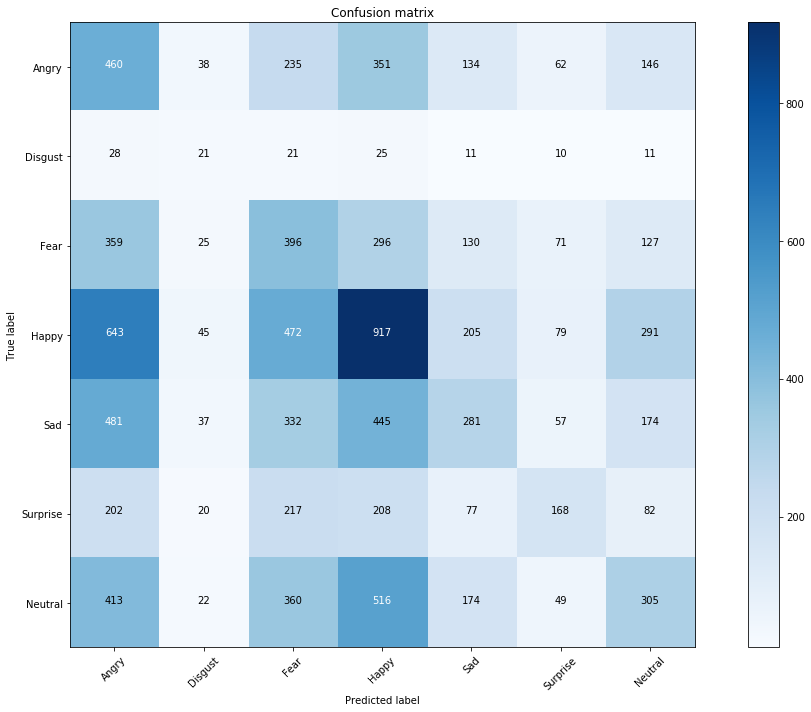

In [279]:
# Compute confusion matrix
cnf_matrix_35 = confusion_matrix(y_test_35, pred_35_3)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix_35, classes=classes,
                      title='Confusion matrix')

plt.show()

<hr>

Evaluate the classifier using different metrics

In [280]:
# https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal

FP_35 = cnf_matrix_35.sum(axis=0) - np.diag(cnf_matrix_35)
FN_35 = cnf_matrix_35.sum(axis=1) - np.diag(cnf_matrix_35)
TP_35 = np.diag(cnf_matrix_35)
TN_35 = cnf_matrix_35.ravel().sum() - (FP_35 + FN_35 + TP_35)

# True positive rate (sensitivity)
TPR_35 = TP_35 / (TP_35 + FN_35)
# True negative rate (specificity)
TNR_35 = TN_35 / (TN_35 + FP_35)
# False positive rate
FPR_35 = FP_35 / (FP_35 + TN_35)

In [281]:
print('\t\t True Positive Rate \t False Positive Rate')
print('Angry \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_35[0], FPR_35[0]))
print('Disgust \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_35[1], FPR_35[1]))
print('Fear \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_35[2], FPR_35[2]))
print('Happy \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_35[3], FPR_35[3]))
print('Sad \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_35[4], FPR_35[4]))
print('Surprise \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_35[5], FPR_35[5]))
print('Neutral \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_35[6], FPR_35[6]))

		 True Positive Rate 	 False Positive Rate
Angry 			 0.323 			 0.242
Disgust 		 0.165 			 0.019
Fear 			 0.282 			 0.185
Happy 			 0.346 			 0.243
Sad 			 0.156 			 0.087
Surprise 		 0.172 			 0.035
Neutral 		 0.166 			 0.099


In [283]:
# Report with precision, recall and f1-scores
print(classification_report(y_test_35, pred_35_3, target_names=classes))

             precision    recall  f1-score   support

      Angry       0.18      0.32      0.23      1426
    Disgust       0.10      0.17      0.13       127
       Fear       0.19      0.28      0.23      1404
      Happy       0.33      0.35      0.34      2652
        Sad       0.28      0.16      0.20      1807
   Surprise       0.34      0.17      0.23       974
    Neutral       0.27      0.17      0.21      1839

avg / total       0.27      0.25      0.25     10229



<hr>

<a id='section5c'></a>
[Top](#toc)
#### Trying splitting the dataset using stratified K fold, cross validating and trying different number of neighbors

In [284]:
rskf_35 = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

# Generate a list of numbers
generate_numbers_35 = list(range(1, 53))

# Get only the odd values out of the list
neighbors_35 = filter(lambda x: x % 2 != 0, generate_numbers_35)

scores_35 = {}   
  
# Start training
for neigh in neighbors_35:
    neigh_35_cv = KNeighborsClassifier(n_neighbors=neigh)
    cv_scores = cross_val_score(neigh_35_cv,
                             main_dataset_best35_labeled.iloc[:, 1:],
                             main_dataset_best35_labeled.iloc[:, 0],
                             cv=rskf_35,
                             scoring='accuracy')
    
    scores_35[str(neigh)+' neighbours'] = cv_scores.mean()
    
    print('Running cross-validation using {} as the number of neighbors'.format(str(neigh)))

Running cross-validation using 1 as the number of neighbors
Running cross-validation using 3 as the number of neighbors
Running cross-validation using 5 as the number of neighbors
Running cross-validation using 7 as the number of neighbors
Running cross-validation using 9 as the number of neighbors
Running cross-validation using 11 as the number of neighbors
Running cross-validation using 13 as the number of neighbors
Running cross-validation using 15 as the number of neighbors
Running cross-validation using 17 as the number of neighbors
Running cross-validation using 19 as the number of neighbors
Running cross-validation using 21 as the number of neighbors
Running cross-validation using 23 as the number of neighbors
Running cross-validation using 25 as the number of neighbors
Running cross-validation using 27 as the number of neighbors
Running cross-validation using 29 as the number of neighbors
Running cross-validation using 31 as the number of neighbors
Running cross-validation usin

In [285]:
sorted_scores_35 = sorted(scores_35.items(), key=operator.itemgetter(1))
print(sorted_scores_35)

[('3 neighbours', 0.2632023421482367), ('5 neighbours', 0.2798205651531754), ('1 neighbours', 0.28348705317501915), ('7 neighbours', 0.28650754063699857), ('9 neighbours', 0.2914878726135905), ('11 neighbours', 0.29337103903899087), ('13 neighbours', 0.29654398444513275), ('15 neighbours', 0.2990081696347264), ('17 neighbours', 0.30158390017557357), ('19 neighbours', 0.30343236444613664), ('21 neighbours', 0.30485190540719725), ('23 neighbours', 0.3060305694423197), ('25 neighbours', 0.3061186355607433), ('27 neighbours', 0.3065820769080307), ('29 neighbours', 0.30686931724268107), ('33 neighbours', 0.3083706032134081), ('31 neighbours', 0.30840605191388126), ('35 neighbours', 0.30901570270380546), ('37 neighbours', 0.30947314113763946), ('39 neighbours', 0.31045855248060605), ('41 neighbours', 0.31104499924430384), ('43 neighbours', 0.31111571940993754), ('45 neighbours', 0.31145010446085153), ('47 neighbours', 0.31182539704120216), ('49 neighbours', 0.3122007291874548), ('51 neighbou

Visualizing the performance of different number of neighbors

In [380]:
# Calculate error rate
errors_35 = {}

for key, value in scores_35.items():
    if (len(key) < 13):
        errors_35['0' + key + ' error'] = 1 - value
    else:
        errors_35[key + ' error'] = 1 - value

sorted_errors_35 = sorted(errors_35.items(), key=operator.itemgetter(0))
print(sorted_errors_35)

# Find the lowest error and choose that as the optimal K
optimal_k_35 = ''    
for key, value in errors_35.items():
    if value == min(errors_35.values()):
        optimal_k_35 = key[:2]
        
print('\nOptimal number of neighbors is {}'.format(optimal_k_35))

[('01 neighbours error', 0.7165129468249809), ('03 neighbours error', 0.7367976578517633), ('05 neighbours error', 0.7201794348468247), ('07 neighbours error', 0.7134924593630014), ('09 neighbours error', 0.7085121273864095), ('11 neighbours error', 0.7066289609610091), ('13 neighbours error', 0.7034560155548673), ('15 neighbours error', 0.7009918303652736), ('17 neighbours error', 0.6984160998244264), ('19 neighbours error', 0.6965676355538634), ('21 neighbours error', 0.6951480945928028), ('23 neighbours error', 0.6939694305576802), ('25 neighbours error', 0.6938813644392567), ('27 neighbours error', 0.6934179230919693), ('29 neighbours error', 0.6931306827573189), ('31 neighbours error', 0.6915939480861187), ('33 neighbours error', 0.6916293967865919), ('35 neighbours error', 0.6909842972961946), ('37 neighbours error', 0.6905268588623605), ('39 neighbours error', 0.689541447519394), ('41 neighbours error', 0.6889550007556962), ('43 neighbours error', 0.6888842805900625), ('45 neigh

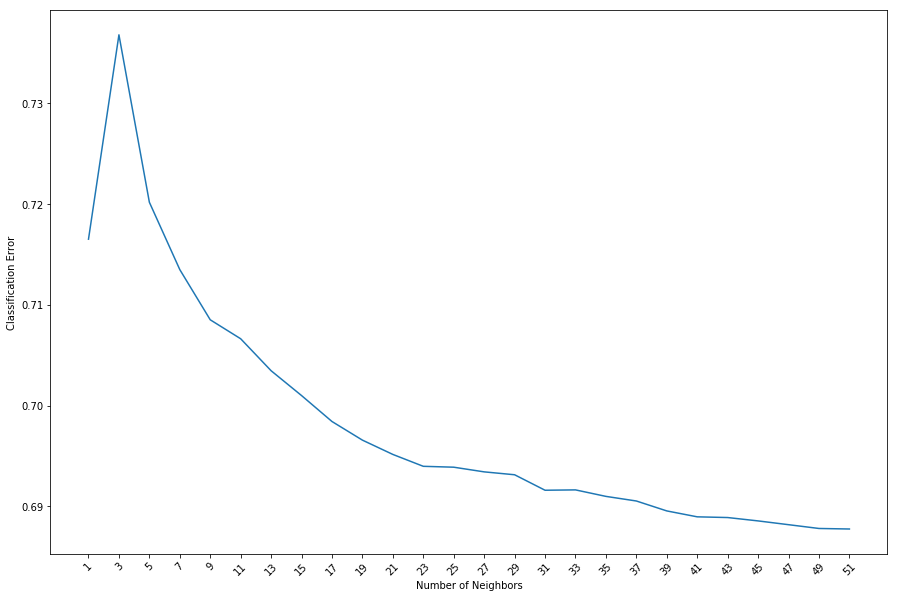

In [381]:
n = list(range(1, 52))
n_35 = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51]
err_35 = []

for i in range(0, 26):
    err_35.append(sorted_errors_35[i][1])

plt.figure(figsize=(15,10))
plt.plot(n_35, err_35)
plt.xticks(n_35, rotation=45)
plt.xlabel('Number of Neighbors')
plt.ylabel('Classification Error')
plt.show()

<hr>

<a id='section5d'></a>
[Top](#toc)
#### Running the classifier on 14 best attributes

Create train and test sets of the features and labels 70-30

In [298]:
X_train_14, X_test_14, y_train_14, y_test_14 = train_test_split(main_dataset_best14_labeled.iloc[:, 1:],
                                                                main_dataset_best14_labeled.iloc[:, 0],
                                                                test_size=0.3,
                                                                random_state=42)

In [299]:
X_train_14.head(10)

,pixel1361,pixel1313,pixel23,pixel24,pixel817,pixel769,pixel1896,pixel1895,pixel10,pixel11,pixel550,pixel598,pixel1407,pixel1455
6122,166,161,189,191,9,9,21,30,155,167,185,182,161,160
4991,162,152,118,108,255,254,91,93,113,122,175,170,152,182
11085,212,212,82,88,71,73,171,173,76,88,213,214,202,194
21409,28,84,175,192,69,61,74,80,82,94,120,113,36,50
10470,49,111,155,151,58,64,207,204,51,59,157,149,127,104
26441,132,111,36,38,7,4,29,35,32,32,108,140,149,149
12861,145,144,196,194,45,49,110,118,93,93,197,189,180,178
1692,228,229,150,144,8,9,120,156,150,148,200,208,230,232
28028,231,228,51,47,100,96,137,97,46,47,196,222,214,215
6749,205,197,15,23,97,99,123,17,27,27,36,27,209,203


Convert data into numpy arrays to make it easier to feed into models and do calculations on them

In [300]:
X_train_14 = np.asarray(X_train_14)
X_test_14 = np.asarray(X_test_14)
y_train_14 = np.asarray(y_train_14)
y_test_14 = np.asarray(y_test_14)

In [301]:
print('Training examples: {}'.format(X_train_14.shape))
print('Testing examples: {}'.format(X_test_14.shape))
print('Training labels: {}'.format(y_train_14.shape))
print('Testing labels: {}'.format(y_test_14.shape))

Training examples: (23865, 14)
Testing examples: (10229, 14)
Training labels: (23865,)
Testing labels: (10229,)


In [302]:
y_train_14 = y_train_14.reshape(y_train_14.shape[0], )
y_test_14 = y_test_14.reshape(y_test_14.shape[0], )

In [303]:
y_train_14.shape

(23865,)

Create the classifier

In [304]:
neigh_14_3 = KNeighborsClassifier(n_neighbors=3)
neigh_14_3.fit(X_train_14, y_train_14) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [305]:
neigh_14_3.score(X_test_14, y_test_14)

0.23550689216932252

In [306]:
# Predict on the test split and return the resulting array
pred_14_3 = neigh_14_3.predict(X_test_14)

Create confusion matrix

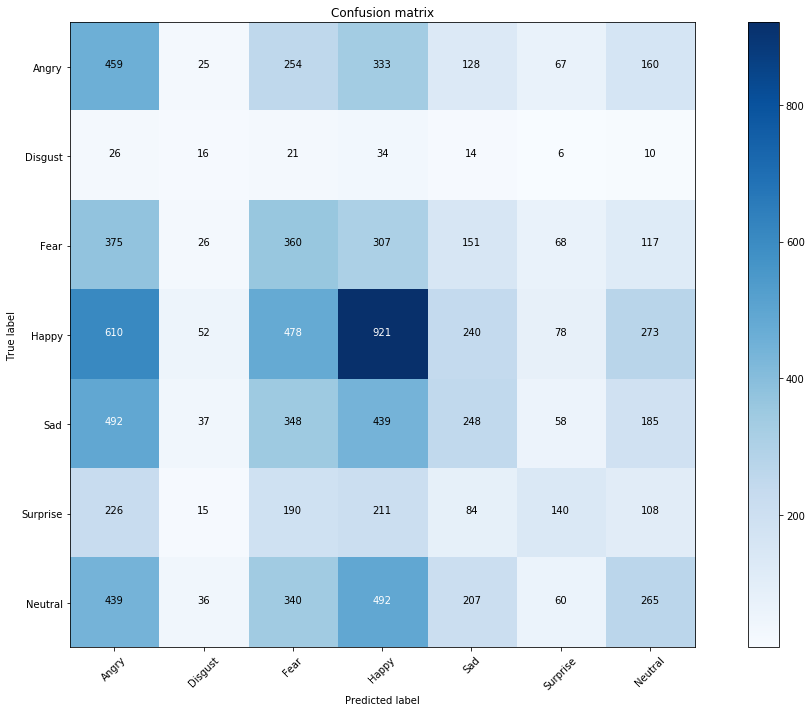

In [307]:
# Compute confusion matrix
cnf_matrix_14 = confusion_matrix(y_test_14, pred_14_3)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(15,10))
plot_confusion_matrix(cnf_matrix_14, classes=classes,
                      title='Confusion matrix')

plt.show()

<hr>

Evaluate the classifier using different metrics

In [308]:
# https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal

FP_14 = cnf_matrix_14.sum(axis=0) - np.diag(cnf_matrix_14)
FN_14 = cnf_matrix_14.sum(axis=1) - np.diag(cnf_matrix_14)
TP_14 = np.diag(cnf_matrix_14)
TN_14 = cnf_matrix_14.ravel().sum() - (FP_14 + FN_14 + TP_14)

# True positive rate (sensitivity)
TPR_14 = TP_14 / (TP_14 + FN_14)
# True negative rate (specificity)
TNR_14 = TN_14 / (TN_14 + FP_14)
# False positive rate
FPR_14 = FP_14 / (FP_14 + TN_14)

In [309]:
print('\t\t True Positive Rate \t False Positive Rate')
print('Angry \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_14[0], FPR_14[0]))
print('Disgust \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_14[1], FPR_14[1]))
print('Fear \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_14[2], FPR_14[2]))
print('Happy \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_14[3], FPR_14[3]))
print('Sad \t\t\t {:.3f} \t\t\t {:.3f}'.format(TPR_14[4], FPR_14[4]))
print('Surprise \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_14[5], FPR_14[5]))
print('Neutral \t\t {:.3f} \t\t\t {:.3f}'.format(TPR_14[6], FPR_14[6]))

		 True Positive Rate 	 False Positive Rate
Angry 			 0.322 			 0.246
Disgust 		 0.126 			 0.019
Fear 			 0.256 			 0.185
Happy 			 0.347 			 0.240
Sad 			 0.137 			 0.098
Surprise 		 0.144 			 0.036
Neutral 		 0.144 			 0.102


In [310]:
# Report with precision, recall and f1-scores
print(classification_report(y_test_14, pred_14_3, target_names=classes))

             precision    recall  f1-score   support

      Angry       0.17      0.32      0.23      1426
    Disgust       0.08      0.13      0.10       127
       Fear       0.18      0.26      0.21      1404
      Happy       0.34      0.35      0.34      2652
        Sad       0.23      0.14      0.17      1807
   Surprise       0.29      0.14      0.19       974
    Neutral       0.24      0.14      0.18      1839

avg / total       0.25      0.24      0.23     10229



<hr>

<a id='section5e'></a>
[Top](#toc)
#### Trying splitting the dataset using stratified K fold, cross validating and trying different number of neighbors

In [397]:
rskf_14 = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

# Generate a list of numbers
generate_numbers_14 = list(range(1, 53))

# Getting the odd values only out of the list
neighbors_14 = filter(lambda x: x % 2 != 0, generate_numbers_14)

scores_14 = {}   
  
# Start training
for neigh in neighbors_14:
    neigh_14_cv = KNeighborsClassifier(n_neighbors=neigh)
    cv_scores = cross_val_score(neigh_14_cv,
                             main_dataset_best14_labeled.iloc[:, 1:],
                             main_dataset_best14_labeled.iloc[:, 0],
                             cv=rskf_14,
                             scoring='accuracy')
    
    scores_14[str(neigh)+' neighbours'] = cv_scores.mean()
    
    print('Running cross-validation using {} as the number of neighbors'.format(str(neigh)))

Running cross-validation using 1 as the number of neighbors
Running cross-validation using 3 as the number of neighbors
Running cross-validation using 5 as the number of neighbors
Running cross-validation using 7 as the number of neighbors
Running cross-validation using 9 as the number of neighbors
Running cross-validation using 11 as the number of neighbors
Running cross-validation using 13 as the number of neighbors
Running cross-validation using 15 as the number of neighbors
Running cross-validation using 17 as the number of neighbors
Running cross-validation using 19 as the number of neighbors
Running cross-validation using 21 as the number of neighbors
Running cross-validation using 23 as the number of neighbors
Running cross-validation using 25 as the number of neighbors
Running cross-validation using 27 as the number of neighbors
Running cross-validation using 29 as the number of neighbors
Running cross-validation using 31 as the number of neighbors
Running cross-validation usin

In [398]:
sorted_scores_14 = sorted(scores_14.items(), key=operator.itemgetter(1))
print(sorted_scores_14)

[('3 neighbours', 0.23852931091442608), ('1 neighbours', 0.25393905710475934), ('5 neighbours', 0.25476603174142665), ('7 neighbours', 0.26131851282541446), ('9 neighbours', 0.26870456622971817), ('11 neighbours', 0.27313350955346327), ('13 neighbours', 0.2777028626165745), ('15 neighbours', 0.2809707941270728), ('17 neighbours', 0.28399759922944373), ('19 neighbours', 0.2859211777203425), ('21 neighbours', 0.2877689969484662), ('23 neighbours', 0.28933500206647617), ('25 neighbours', 0.2913121857288115), ('27 neighbours', 0.2923738332386378), ('29 neighbours', 0.29300733156252806), ('31 neighbours', 0.2938928539112498), ('33 neighbours', 0.29458471417602644), ('41 neighbours', 0.2954411673504802), ('35 neighbours', 0.29552890826039374), ('37 neighbours', 0.2956582297039354), ('43 neighbours', 0.2959691249276691), ('39 neighbours', 0.2960508473077527), ('45 neighbours', 0.2960923453027974), ('47 neighbours', 0.296837414954637), ('49 neighbours', 0.29797546185163315), ('51 neighbours', 

Visualizing the performance of different number of neighbors

In [399]:
# Calculate error rate
errors_14 = {}

for key, value in scores_14.items():
    if (len(key) < 13):
        errors_14['0' + key + ' error'] = 1 - value
    else:
        errors_14[key + ' error'] = 1 - value

sorted_errors_14 = sorted(errors_14.items(), key=operator.itemgetter(0))
print(sorted_errors_14)

# Find the lowest error and choose that as the optimal K
optimal_k_14 = ''    
for key, value in errors_14.items():
    if value == min(errors_14.values()):
        optimal_k_14 = key[:2]
        
print('\nOptimal number of neighbors is {}'.format(optimal_k_14))

[('01 neighbours error', 0.7460609428952407), ('03 neighbours error', 0.7614706890855739), ('05 neighbours error', 0.7452339682585734), ('07 neighbours error', 0.7386814871745855), ('09 neighbours error', 0.7312954337702818), ('11 neighbours error', 0.7268664904465367), ('13 neighbours error', 0.7222971373834255), ('15 neighbours error', 0.7190292058729272), ('17 neighbours error', 0.7160024007705563), ('19 neighbours error', 0.7140788222796575), ('21 neighbours error', 0.7122310030515338), ('23 neighbours error', 0.7106649979335238), ('25 neighbours error', 0.7086878142711885), ('27 neighbours error', 0.7076261667613621), ('29 neighbours error', 0.7069926684374719), ('31 neighbours error', 0.7061071460887502), ('33 neighbours error', 0.7054152858239735), ('35 neighbours error', 0.7044710917396062), ('37 neighbours error', 0.7043417702960646), ('39 neighbours error', 0.7039491526922472), ('41 neighbours error', 0.7045588326495198), ('43 neighbours error', 0.704030875072331), ('45 neigh

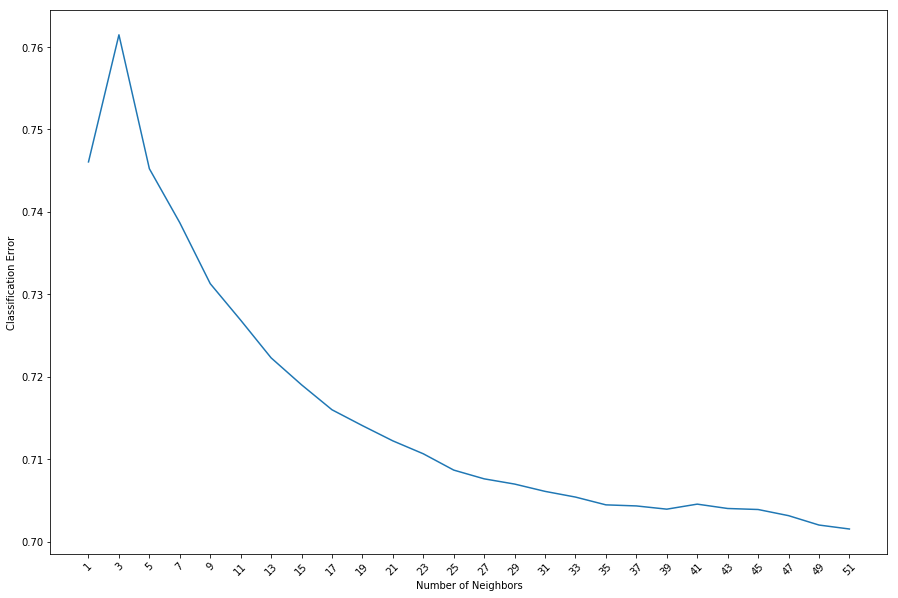

In [400]:
n = list(range(1, 52))
n_14 = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51]
err_14 = []

for i in range(0, 26):
    err_14.append(sorted_errors_14[i][1])

plt.figure(figsize=(15,10))
plt.plot(n_14, err_14)
plt.xticks(n_14, rotation=45)
plt.xlabel('Number of Neighbors')
plt.ylabel('Classification Error')
plt.show()

<hr>

<a id='section6'></a>
[Top](#toc)
## 7. References

1. [Python Pandas Documentation](https://pandas.pydata.org/)
2. [Scikit-Learn Documentation](http://scikit-learn.org/)
3. [Confusion Matrix Visualization Code](http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
4. [Optimizing number of neighbors using cross-validation](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)